In [168]:
import pandas as pd
import pickle
from threading import Thread
import os, math
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import nltk
stemmer = PorterStemmer()
cachedStopWords = stopwords.words("english")

## THis is the classification system
we will use it on raw and on stop data dict


In [120]:
def save_it_all(obj, filename):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
    
def load_objects(file):
    with open(file, 'rb') as input:
        return pickle.load(input)

def saveFrame(df, name):
    df.to_csv(name+".csv", index=False, sep=",", header=True)
    save_it_all(df, name+".pkl")
    
def dictHelper():
    res = {}
    for ty in types:
        res[ty] = 0
    return res

In [121]:
# load stop data dict and vocab and stop frame
stop_dict = load_objects("./stopBigDict.pkl")
stop_trained_frame = load_objects("./stop_training_data.pkl")
stop_vocab = load_objects("./stop_vocabulary.pkl")

# raw data
raw_dict = load_objects("../RawFiles/rawBigDict.pkl")
raw_trained_frame = load_objects("../RawFiles/raw_data_info_frame.pkl")
raw_vocab = load_objects("../RawFiles/raw_vocabulary.pkl")

# stem
stem_dict = load_objects("../StemFiles/stemBigDict.pkl")
stem_trained_frame = load_objects("../StemFiles/stem_training_data.pkl")
stem_vocab = load_objects("../StemFiles/stem_vocabulary.pkl")

# word len
word_len_dict = load_objects("../WordLengthFiles/wordLenBigDict.pkl")
word_len_trained_frame = load_objects("../WordLengthFiles/word_len_training_data.pkl")
word_len_vocab = load_objects("../WordLengthFiles/word_len_vocabulary.pkl")

# test data
testFrame = pd.read_csv("../RawFiles/raw_test_data.csv", sep=",")


In [122]:
types = stop_trained_frame["Type"].tolist()
sizes = {'medicine': 396, 'christianity': 398, 'xwindows': 392, 'autos': 395, 'mac': 385, 'graphics': 389, 'atheism': 319, 'forsale': 390, 'pc': 392, 'hockey': 399, 'mswindows': 393, 'baseball': 397, 'mideastpolitics': 376, 'politics': 310, 'guns': 364, 'religion': 251, 'electronics': 393, 'cryptology': 396, 'motorcycles': 398, 'space': 394}


print(len(raw_vocab))
print(len(stop_vocab))
print(len(stem_vocab))


print(len(stop_dict.items()))
print(len(raw_dict.items()))

73712
73560
55043
1471200
1474240


In [123]:
stop_trained_frame.head()

,Type,Document,ClassProbability,WordPositions,WordCount
0,medicine,info needed gaucher disease yr old male friend...,0.052599,96436,"{'relative': {'count': 5, 'probability': 3.529..."
1,christianity,sex education article mar athos rutgers edu sw...,0.0529532,105784,"{'relative': {'count': 4, 'probability': 2.787..."
2,xwindows,th international obfuscated c code contest ope...,0.0525104,108877,"{'relative': {'count': 5, 'probability': 3.288..."
3,autos,saturn pricing policy article c vir l r shuksa...,0.052599,69104,"{'relative': {'count': 5, 'probability': 4.205..."
4,mac,nutek faces apple wrath article read article d...,0.0511821,54446,"{'relative': {'count': 2, 'probability': 2.343..."


In [124]:
raw_trained_frame.head()

,Type,Document,ClassProbability,WordPositions,WordCount
0,mideastpolitics,re islam borders was israel misisipi to ganges...,0.0499424,272488,"{'hepis': {'count': 0, 'probability': 2.888503..."
1,politics,re media horrified at perot investigating bush...,0.0411759,202625,"{'hepis': {'count': 0, 'probability': 3.618769..."
2,religion,re religion and homosexuality magarret magnus ...,0.0333835,129611,"{'hepis': {'count': 0, 'probability': 4.918282..."
3,mac,re nutek faces apple s wrath article read in a...,0.0511821,97182,"{'hepis': {'count': 0, 'probability': 5.851580..."
4,forsale,motorcycle wanted followup to kedz wpi wpi edu...,0.051802,69761,"{'hepis': {'count': 0, 'probability': 6.969952..."


### CLASIFICATION CELLS

In [162]:
right, total = processStop(stop_trained_frame, testFrame, stop_dict, stop_vocab)

print("THE FINAL RESULT IS:")
print(str(right/total) + "% predicated correctly!!")

0
Success! predicted: atheism real: atheism
Result dict:1
1
Success! predicted: atheism real: atheism
Result dict:2
2
Success! predicted: atheism real: atheism
Result dict:3
3
Success! predicted: atheism real: atheism
Result dict:4
4
Success! predicted: atheism real: atheism
Result dict:5
5
Success! predicted: atheism real: atheism
Result dict:6
6
7
Success! predicted: atheism real: atheism
Result dict:7
8
Success! predicted: atheism real: atheism
Result dict:8
9
Success! predicted: atheism real: atheism
Result dict:9
10
Success! predicted: atheism real: atheism
Result dict:10
11
Success! predicted: atheism real: atheism
Result dict:11
12
Success! predicted: atheism real: atheism
Result dict:12
13
Success! predicted: atheism real: atheism
Result dict:13
14
Success! predicted: atheism real: atheism
Result dict:14
15
Success! predicted: atheism real: atheism
Result dict:15
16
Success! predicted: atheism real: atheism
Result dict:16
17
Success! predicted: atheism real: atheism
Result dict

Success! predicted: atheism real: atheism
Result dict:134
175
Success! predicted: atheism real: atheism
Result dict:135
176
Success! predicted: atheism real: atheism
Result dict:136
177
178
179
180
Success! predicted: atheism real: atheism
Result dict:137
181
Success! predicted: atheism real: atheism
Result dict:138
182
Success! predicted: atheism real: atheism
Result dict:139
183
184
Success! predicted: atheism real: atheism
Result dict:140
185
Success! predicted: atheism real: atheism
Result dict:141
186
Success! predicted: atheism real: atheism
Result dict:142
187
Success! predicted: atheism real: atheism
Result dict:143
188
Success! predicted: atheism real: atheism
Result dict:144
189
Success! predicted: atheism real: atheism
Result dict:145
190
Success! predicted: atheism real: atheism
Result dict:146
191
192
Success! predicted: atheism real: atheism
Result dict:147
193
Success! predicted: atheism real: atheism
Result dict:148
194
195
196
Success! predicted: atheism real: atheism


Success! predicted: graphics real: graphics
Result dict:21
345
Success! predicted: graphics real: graphics
Result dict:22
346
Success! predicted: graphics real: graphics
Result dict:23
347
Success! predicted: graphics real: graphics
Result dict:24
348
Success! predicted: graphics real: graphics
Result dict:25
349
Success! predicted: graphics real: graphics
Result dict:26
350
Success! predicted: graphics real: graphics
Result dict:27
351
Success! predicted: graphics real: graphics
Result dict:28
352
Success! predicted: graphics real: graphics
Result dict:29
353
Success! predicted: graphics real: graphics
Result dict:30
354
355
Success! predicted: graphics real: graphics
Result dict:31
356
Success! predicted: graphics real: graphics
Result dict:32
357
Success! predicted: graphics real: graphics
Result dict:33
358
Success! predicted: graphics real: graphics
Result dict:34
359
Success! predicted: graphics real: graphics
Result dict:35
360
Success! predicted: graphics real: graphics
Result 

Success! predicted: graphics real: graphics
Result dict:152
493
Success! predicted: graphics real: graphics
Result dict:153
494
Success! predicted: graphics real: graphics
Result dict:154
495
Success! predicted: graphics real: graphics
Result dict:155
496
Success! predicted: graphics real: graphics
Result dict:156
497
Success! predicted: graphics real: graphics
Result dict:157
498
Success! predicted: graphics real: graphics
Result dict:158
499
Success! predicted: graphics real: graphics
Result dict:159
500
Success! predicted: graphics real: graphics
Result dict:160
501
Success! predicted: graphics real: graphics
Result dict:161
502
Success! predicted: graphics real: graphics
Result dict:162
503
Success! predicted: graphics real: graphics
Result dict:163
504
Success! predicted: graphics real: graphics
Result dict:164
505
Success! predicted: graphics real: graphics
Result dict:165
506
Success! predicted: graphics real: graphics
Result dict:166
507
Success! predicted: graphics real: graph

Success! predicted: graphics real: graphics
Result dict:278
662
Success! predicted: graphics real: graphics
Result dict:279
663
Success! predicted: graphics real: graphics
Result dict:280
664
Success! predicted: graphics real: graphics
Result dict:281
665
Success! predicted: graphics real: graphics
Result dict:282
666
Success! predicted: graphics real: graphics
Result dict:283
667
Success! predicted: graphics real: graphics
Result dict:284
668
Success! predicted: graphics real: graphics
Result dict:285
669
Success! predicted: graphics real: graphics
Result dict:286
670
Success! predicted: graphics real: graphics
Result dict:287
671
Success! predicted: graphics real: graphics
Result dict:288
672
Success! predicted: graphics real: graphics
Result dict:289
673
Success! predicted: graphics real: graphics
Result dict:290
674
Success! predicted: graphics real: graphics
Result dict:291
675
Success! predicted: graphics real: graphics
Result dict:292
676
677
678
Success! predicted: graphics rea

Success! predicted: mswindows real: mswindows
Result dict:86
837
Success! predicted: mswindows real: mswindows
Result dict:87
838
839
Success! predicted: mswindows real: mswindows
Result dict:88
840
Success! predicted: mswindows real: mswindows
Result dict:89
841
Success! predicted: mswindows real: mswindows
Result dict:90
842
Success! predicted: mswindows real: mswindows
Result dict:91
843
Success! predicted: mswindows real: mswindows
Result dict:92
844
Success! predicted: mswindows real: mswindows
Result dict:93
845
Success! predicted: mswindows real: mswindows
Result dict:94
846
847
Success! predicted: mswindows real: mswindows
Result dict:95
848
Success! predicted: mswindows real: mswindows
Result dict:96
849
Success! predicted: mswindows real: mswindows
Result dict:97
850
851
Success! predicted: mswindows real: mswindows
Result dict:98
852
853
Success! predicted: mswindows real: mswindows
Result dict:99
854
Success! predicted: mswindows real: mswindows
Result dict:100
855
Success!

1023
1024
1025
Success! predicted: mswindows real: mswindows
Result dict:208
1026
1027
Success! predicted: mswindows real: mswindows
Result dict:209
1028
Success! predicted: mswindows real: mswindows
Result dict:210
1029
Success! predicted: mswindows real: mswindows
Result dict:211
1030
Success! predicted: mswindows real: mswindows
Result dict:212
1031
1032
1033
Success! predicted: mswindows real: mswindows
Result dict:213
1034
Success! predicted: mswindows real: mswindows
Result dict:214
1035
1036
1037
Success! predicted: mswindows real: mswindows
Result dict:215
1038
Success! predicted: mswindows real: mswindows
Result dict:216
1039
Success! predicted: mswindows real: mswindows
Result dict:217
1040
1041
Success! predicted: mswindows real: mswindows
Result dict:218
1042
1043
Success! predicted: mswindows real: mswindows
Result dict:219
1044
Success! predicted: mswindows real: mswindows
Result dict:220
1045
Success! predicted: mswindows real: mswindows
Result dict:221
1046
1047
1048
Su

Success! predicted: pc real: pc
Result dict:92
1216
Success! predicted: pc real: pc
Result dict:93
1217
Success! predicted: pc real: pc
Result dict:94
1218
Success! predicted: pc real: pc
Result dict:95
1219
Success! predicted: pc real: pc
Result dict:96
1220
Success! predicted: pc real: pc
Result dict:97
1221
Success! predicted: pc real: pc
Result dict:98
1222
Success! predicted: pc real: pc
Result dict:99
1223
Success! predicted: pc real: pc
Result dict:100
1224
Success! predicted: pc real: pc
Result dict:101
1225
Success! predicted: pc real: pc
Result dict:102
1226
Success! predicted: pc real: pc
Result dict:103
1227
Success! predicted: pc real: pc
Result dict:104
1228
Success! predicted: pc real: pc
Result dict:105
1229
Success! predicted: pc real: pc
Result dict:106
1230
Success! predicted: pc real: pc
Result dict:107
1231
Success! predicted: pc real: pc
Result dict:108
1232
1233
Success! predicted: pc real: pc
Result dict:109
1234
1235
Success! predicted: pc real: pc
Result dict:

Success! predicted: pc real: pc
Result dict:246
1414
Success! predicted: pc real: pc
Result dict:247
1415
Success! predicted: pc real: pc
Result dict:248
1416
Success! predicted: pc real: pc
Result dict:249
1417
Success! predicted: pc real: pc
Result dict:250
1418
1419
1420
1421
Success! predicted: pc real: pc
Result dict:251
1422
Success! predicted: pc real: pc
Result dict:252
1423
Success! predicted: pc real: pc
Result dict:253
1424
1425
Success! predicted: pc real: pc
Result dict:254
1426
1427
Success! predicted: pc real: pc
Result dict:255
1428
Success! predicted: pc real: pc
Result dict:256
1429
Success! predicted: pc real: pc
Result dict:257
1430
Success! predicted: pc real: pc
Result dict:258
1431
Success! predicted: pc real: pc
Result dict:259
1432
Success! predicted: pc real: pc
Result dict:260
1433
Success! predicted: pc real: pc
Result dict:261
1434
Success! predicted: pc real: pc
Result dict:262
1435
1436
1437
Success! predicted: pc real: pc
Result dict:263
1438
Success! pr

1608
1609
1610
Success! predicted: mac real: mac
Result dict:87
1611
1612
Success! predicted: mac real: mac
Result dict:88
1613
Success! predicted: mac real: mac
Result dict:89
1614
Success! predicted: mac real: mac
Result dict:90
1615
1616
Success! predicted: mac real: mac
Result dict:91
1617
Success! predicted: mac real: mac
Result dict:92
1618
Success! predicted: mac real: mac
Result dict:93
1619
Success! predicted: mac real: mac
Result dict:94
1620
Success! predicted: mac real: mac
Result dict:95
1621
Success! predicted: mac real: mac
Result dict:96
1622
Success! predicted: mac real: mac
Result dict:97
1623
Success! predicted: mac real: mac
Result dict:98
1624
1625
Success! predicted: mac real: mac
Result dict:99
1626
1627
Success! predicted: mac real: mac
Result dict:100
1628
Success! predicted: mac real: mac
Result dict:101
1629
Success! predicted: mac real: mac
Result dict:102
1630
Success! predicted: mac real: mac
Result dict:103
1631
1632
Success! predicted: mac real: mac
Resu

Success! predicted: mac real: mac
Result dict:233
1800
Success! predicted: mac real: mac
Result dict:234
1801
Success! predicted: mac real: mac
Result dict:235
1802
Success! predicted: mac real: mac
Result dict:236
1803
Success! predicted: mac real: mac
Result dict:237
1804
Success! predicted: mac real: mac
Result dict:238
1805
Success! predicted: mac real: mac
Result dict:239
1806
Success! predicted: mac real: mac
Result dict:240
1807
Success! predicted: mac real: mac
Result dict:241
1808
Success! predicted: mac real: mac
Result dict:242
1809
1810
Success! predicted: mac real: mac
Result dict:243
1811
1812
Success! predicted: mac real: mac
Result dict:244
1813
Success! predicted: mac real: mac
Result dict:245
1814
Success! predicted: mac real: mac
Result dict:246
1815
Success! predicted: mac real: mac
Result dict:247
1816
1817
Success! predicted: mac real: mac
Result dict:248
1818
Success! predicted: mac real: mac
Result dict:249
1819
Success! predicted: mac real: mac
Result dict:250


1974
1975
Success! predicted: xwindows real: xwindows
Result dict:75
1976
Success! predicted: xwindows real: xwindows
Result dict:76
1977
Success! predicted: xwindows real: xwindows
Result dict:77
1978
Success! predicted: xwindows real: xwindows
Result dict:78
1979
Success! predicted: xwindows real: xwindows
Result dict:79
1980
Success! predicted: xwindows real: xwindows
Result dict:80
1981
Success! predicted: xwindows real: xwindows
Result dict:81
1982
1983
Success! predicted: xwindows real: xwindows
Result dict:82
1984
Success! predicted: xwindows real: xwindows
Result dict:83
1985
Success! predicted: xwindows real: xwindows
Result dict:84
1986
Success! predicted: xwindows real: xwindows
Result dict:85
1987
Success! predicted: xwindows real: xwindows
Result dict:86
1988
Success! predicted: xwindows real: xwindows
Result dict:87
1989
Success! predicted: xwindows real: xwindows
Result dict:88
1990
Success! predicted: xwindows real: xwindows
Result dict:89
1991
Success! predicted: xwind

Success! predicted: xwindows real: xwindows
Result dict:201
2130
Success! predicted: xwindows real: xwindows
Result dict:202
2131
Success! predicted: xwindows real: xwindows
Result dict:203
2132
2133
Success! predicted: xwindows real: xwindows
Result dict:204
2134
2135
Success! predicted: xwindows real: xwindows
Result dict:205
2136
Success! predicted: xwindows real: xwindows
Result dict:206
2137
Success! predicted: xwindows real: xwindows
Result dict:207
2138
2139
Success! predicted: xwindows real: xwindows
Result dict:208
2140
2141
2142
2143
Success! predicted: xwindows real: xwindows
Result dict:209
2144
Success! predicted: xwindows real: xwindows
Result dict:210
2145
Success! predicted: xwindows real: xwindows
Result dict:211
2146
2147
Success! predicted: xwindows real: xwindows
Result dict:212
2148
Success! predicted: xwindows real: xwindows
Result dict:213
2149
Success! predicted: xwindows real: xwindows
Result dict:214
2150
Success! predicted: xwindows real: xwindows
Result dict

Success! predicted: forsale real: forsale
Result dict:10
2288
Success! predicted: forsale real: forsale
Result dict:11
2289
2290
Success! predicted: forsale real: forsale
Result dict:12
2291
Success! predicted: forsale real: forsale
Result dict:13
2292
Success! predicted: forsale real: forsale
Result dict:14
2293
Success! predicted: forsale real: forsale
Result dict:15
2294
2295
Success! predicted: forsale real: forsale
Result dict:16
2296
2297
2298
Success! predicted: forsale real: forsale
Result dict:17
2299
2300
Success! predicted: forsale real: forsale
Result dict:18
2301
2302
2303
Success! predicted: forsale real: forsale
Result dict:19
2304
Success! predicted: forsale real: forsale
Result dict:20
2305
Success! predicted: forsale real: forsale
Result dict:21
2306
Success! predicted: forsale real: forsale
Result dict:22
2307
Success! predicted: forsale real: forsale
Result dict:23
2308
Success! predicted: forsale real: forsale
Result dict:24
2309
Success! predicted: forsale real: f

Success! predicted: forsale real: forsale
Result dict:139
2476
2477
Success! predicted: forsale real: forsale
Result dict:140
2478
2479
Success! predicted: forsale real: forsale
Result dict:141
2480
2481
Success! predicted: forsale real: forsale
Result dict:142
2482
Success! predicted: forsale real: forsale
Result dict:143
2483
Success! predicted: forsale real: forsale
Result dict:144
2484
2485
Success! predicted: forsale real: forsale
Result dict:145
2486
Success! predicted: forsale real: forsale
Result dict:146
2487
Success! predicted: forsale real: forsale
Result dict:147
2488
Success! predicted: forsale real: forsale
Result dict:148
2489
Success! predicted: forsale real: forsale
Result dict:149
2490
Success! predicted: forsale real: forsale
Result dict:150
2491
Success! predicted: forsale real: forsale
Result dict:151
2492
2493
Success! predicted: forsale real: forsale
Result dict:152
2494
Success! predicted: forsale real: forsale
Result dict:153
2495
Success! predicted: forsale re

2651
Success! predicted: forsale real: forsale
Result dict:266
2652
Success! predicted: forsale real: forsale
Result dict:267
2653
Success! predicted: forsale real: forsale
Result dict:268
2654
Success! predicted: forsale real: forsale
Result dict:269
2655
Success! predicted: forsale real: forsale
Result dict:270
2656
Success! predicted: forsale real: forsale
Result dict:271
2657
Success! predicted: forsale real: forsale
Result dict:272
2658
Success! predicted: forsale real: forsale
Result dict:273
2659
2660
Success! predicted: forsale real: forsale
Result dict:274
2661
Success! predicted: autos real: autos
Result dict:1
2662
Success! predicted: autos real: autos
Result dict:2
2663
Success! predicted: autos real: autos
Result dict:3
2664
Success! predicted: autos real: autos
Result dict:4
2665
Success! predicted: autos real: autos
Result dict:5
2666
Success! predicted: autos real: autos
Result dict:6
2667
Success! predicted: autos real: autos
Result dict:7
2668
Success! predicted: auto

Success! predicted: autos real: autos
Result dict:133
2805
Success! predicted: autos real: autos
Result dict:134
2806
Success! predicted: autos real: autos
Result dict:135
2807
Success! predicted: autos real: autos
Result dict:136
2808
Success! predicted: autos real: autos
Result dict:137
2809
Success! predicted: autos real: autos
Result dict:138
2810
Success! predicted: autos real: autos
Result dict:139
2811
Success! predicted: autos real: autos
Result dict:140
2812
2813
Success! predicted: autos real: autos
Result dict:141
2814
Success! predicted: autos real: autos
Result dict:142
2815
Success! predicted: autos real: autos
Result dict:143
2816
Success! predicted: autos real: autos
Result dict:144
2817
Success! predicted: autos real: autos
Result dict:145
2818
Success! predicted: autos real: autos
Result dict:146
2819
Success! predicted: autos real: autos
Result dict:147
2820
Success! predicted: autos real: autos
Result dict:148
2821
Success! predicted: autos real: autos
Result dict:1

Success! predicted: autos real: autos
Result dict:272
2954
Success! predicted: autos real: autos
Result dict:273
2955
2956
2957
Success! predicted: autos real: autos
Result dict:274
2958
Success! predicted: autos real: autos
Result dict:275
2959
2960
Success! predicted: autos real: autos
Result dict:276
2961
Success! predicted: autos real: autos
Result dict:277
2962
Success! predicted: autos real: autos
Result dict:278
2963
2964
Success! predicted: autos real: autos
Result dict:279
2965
Success! predicted: autos real: autos
Result dict:280
2966
Success! predicted: autos real: autos
Result dict:281
2967
Success! predicted: autos real: autos
Result dict:282
2968
Success! predicted: autos real: autos
Result dict:283
2969
Success! predicted: autos real: autos
Result dict:284
2970
Success! predicted: autos real: autos
Result dict:285
2971
Success! predicted: autos real: autos
Result dict:286
2972
Success! predicted: autos real: autos
Result dict:287
2973
Success! predicted: autos real: auto

Success! predicted: motorcycles real: motorcycles
Result dict:42
3099
Success! predicted: motorcycles real: motorcycles
Result dict:43
3100
Success! predicted: motorcycles real: motorcycles
Result dict:44
3101
3102
Success! predicted: motorcycles real: motorcycles
Result dict:45
3103
Success! predicted: motorcycles real: motorcycles
Result dict:46
3104
Success! predicted: motorcycles real: motorcycles
Result dict:47
3105
Success! predicted: motorcycles real: motorcycles
Result dict:48
3106
Success! predicted: motorcycles real: motorcycles
Result dict:49
3107
Success! predicted: motorcycles real: motorcycles
Result dict:50
3108
Success! predicted: motorcycles real: motorcycles
Result dict:51
3109
Success! predicted: motorcycles real: motorcycles
Result dict:52
3110
3111
Success! predicted: motorcycles real: motorcycles
Result dict:53
3112
Success! predicted: motorcycles real: motorcycles
Result dict:54
3113
3114
Success! predicted: motorcycles real: motorcycles
Result dict:55
3115
Succe

3225
Success! predicted: motorcycles real: motorcycles
Result dict:159
3226
Success! predicted: motorcycles real: motorcycles
Result dict:160
3227
Success! predicted: motorcycles real: motorcycles
Result dict:161
3228
Success! predicted: motorcycles real: motorcycles
Result dict:162
3229
Success! predicted: motorcycles real: motorcycles
Result dict:163
3230
Success! predicted: motorcycles real: motorcycles
Result dict:164
3231
Success! predicted: motorcycles real: motorcycles
Result dict:165
3232
Success! predicted: motorcycles real: motorcycles
Result dict:166
3233
Success! predicted: motorcycles real: motorcycles
Result dict:167
3234
Success! predicted: motorcycles real: motorcycles
Result dict:168
3235
Success! predicted: motorcycles real: motorcycles
Result dict:169
3236
Success! predicted: motorcycles real: motorcycles
Result dict:170
3237
Success! predicted: motorcycles real: motorcycles
Result dict:171
3238
Success! predicted: motorcycles real: motorcycles
Result dict:172
3239
S

3347
3348
Success! predicted: motorcycles real: motorcycles
Result dict:276
3349
Success! predicted: motorcycles real: motorcycles
Result dict:277
3350
Success! predicted: motorcycles real: motorcycles
Result dict:278
3351
Success! predicted: motorcycles real: motorcycles
Result dict:279
3352
Success! predicted: motorcycles real: motorcycles
Result dict:280
3353
Success! predicted: motorcycles real: motorcycles
Result dict:281
3354
Success! predicted: motorcycles real: motorcycles
Result dict:282
3355
Success! predicted: motorcycles real: motorcycles
Result dict:283
3356
Success! predicted: motorcycles real: motorcycles
Result dict:284
3357
Success! predicted: motorcycles real: motorcycles
Result dict:285
3358
Success! predicted: motorcycles real: motorcycles
Result dict:286
3359
3360
Success! predicted: motorcycles real: motorcycles
Result dict:287
3361
Success! predicted: motorcycles real: motorcycles
Result dict:288
3362
Success! predicted: motorcycles real: motorcycles
Result dict:

Success! predicted: baseball real: baseball
Result dict:20
3477
Success! predicted: baseball real: baseball
Result dict:21
3478
Success! predicted: baseball real: baseball
Result dict:22
3479
Success! predicted: baseball real: baseball
Result dict:23
3480
Success! predicted: baseball real: baseball
Result dict:24
3481
Success! predicted: baseball real: baseball
Result dict:25
3482
Success! predicted: baseball real: baseball
Result dict:26
3483
Success! predicted: baseball real: baseball
Result dict:27
3484
Success! predicted: baseball real: baseball
Result dict:28
3485
Success! predicted: baseball real: baseball
Result dict:29
3486
Success! predicted: baseball real: baseball
Result dict:30
3487
Success! predicted: baseball real: baseball
Result dict:31
3488
Success! predicted: baseball real: baseball
Result dict:32
3489
Success! predicted: baseball real: baseball
Result dict:33
3490
Success! predicted: baseball real: baseball
Result dict:34
3491
Success! predicted: baseball real: baseb

Success! predicted: baseball real: baseball
Result dict:148
3616
Success! predicted: baseball real: baseball
Result dict:149
3617
Success! predicted: baseball real: baseball
Result dict:150
3618
Success! predicted: baseball real: baseball
Result dict:151
3619
Success! predicted: baseball real: baseball
Result dict:152
3620
Success! predicted: baseball real: baseball
Result dict:153
3621
3622
Success! predicted: baseball real: baseball
Result dict:154
3623
Success! predicted: baseball real: baseball
Result dict:155
3624
Success! predicted: baseball real: baseball
Result dict:156
3625
Success! predicted: baseball real: baseball
Result dict:157
3626
Success! predicted: baseball real: baseball
Result dict:158
3627
Success! predicted: baseball real: baseball
Result dict:159
3628
Success! predicted: baseball real: baseball
Result dict:160
3629
3630
Success! predicted: baseball real: baseball
Result dict:161
3631
Success! predicted: baseball real: baseball
Result dict:162
3632
Success! predic

Success! predicted: baseball real: baseball
Result dict:277
3756
Success! predicted: baseball real: baseball
Result dict:278
3757
Success! predicted: baseball real: baseball
Result dict:279
3758
3759
Success! predicted: baseball real: baseball
Result dict:280
3760
Success! predicted: baseball real: baseball
Result dict:281
3761
Success! predicted: baseball real: baseball
Result dict:282
3762
Success! predicted: baseball real: baseball
Result dict:283
3763
Success! predicted: baseball real: baseball
Result dict:284
3764
Success! predicted: baseball real: baseball
Result dict:285
3765
Success! predicted: baseball real: baseball
Result dict:286
3766
Success! predicted: baseball real: baseball
Result dict:287
3767
Success! predicted: baseball real: baseball
Result dict:288
3768
Success! predicted: baseball real: baseball
Result dict:289
3769
Success! predicted: baseball real: baseball
Result dict:290
3770
Success! predicted: baseball real: baseball
Result dict:291
3771
Success! predicted: 

Success! predicted: hockey real: hockey
Result dict:39
3890
Success! predicted: hockey real: hockey
Result dict:40
3891
Success! predicted: hockey real: hockey
Result dict:41
3892
Success! predicted: hockey real: hockey
Result dict:42
3893
Success! predicted: hockey real: hockey
Result dict:43
3894
Success! predicted: hockey real: hockey
Result dict:44
3895
Success! predicted: hockey real: hockey
Result dict:45
3896
Success! predicted: hockey real: hockey
Result dict:46
3897
Success! predicted: hockey real: hockey
Result dict:47
3898
Success! predicted: hockey real: hockey
Result dict:48
3899
Success! predicted: hockey real: hockey
Result dict:49
3900
Success! predicted: hockey real: hockey
Result dict:50
3901
Success! predicted: hockey real: hockey
Result dict:51
3902
Success! predicted: hockey real: hockey
Result dict:52
3903
Success! predicted: hockey real: hockey
Result dict:53
3904
Success! predicted: hockey real: hockey
Result dict:54
3905
Success! predicted: hockey real: hockey


Success! predicted: hockey real: hockey
Result dict:178
4031
Success! predicted: hockey real: hockey
Result dict:179
4032
Success! predicted: hockey real: hockey
Result dict:180
4033
Success! predicted: hockey real: hockey
Result dict:181
4034
Success! predicted: hockey real: hockey
Result dict:182
4035
Success! predicted: hockey real: hockey
Result dict:183
4036
Success! predicted: hockey real: hockey
Result dict:184
4037
Success! predicted: hockey real: hockey
Result dict:185
4038
Success! predicted: hockey real: hockey
Result dict:186
4039
Success! predicted: hockey real: hockey
Result dict:187
4040
Success! predicted: hockey real: hockey
Result dict:188
4041
Success! predicted: hockey real: hockey
Result dict:189
4042
Success! predicted: hockey real: hockey
Result dict:190
4043
Success! predicted: hockey real: hockey
Result dict:191
4044
Success! predicted: hockey real: hockey
Result dict:192
4045
Success! predicted: hockey real: hockey
Result dict:193
4046
Success! predicted: hock

Success! predicted: hockey real: hockey
Result dict:314
4171
Success! predicted: hockey real: hockey
Result dict:315
4172
Success! predicted: hockey real: hockey
Result dict:316
4173
Success! predicted: hockey real: hockey
Result dict:317
4174
Success! predicted: hockey real: hockey
Result dict:318
4175
Success! predicted: hockey real: hockey
Result dict:319
4176
Success! predicted: hockey real: hockey
Result dict:320
4177
Success! predicted: hockey real: hockey
Result dict:321
4178
Success! predicted: hockey real: hockey
Result dict:322
4179
Success! predicted: hockey real: hockey
Result dict:323
4180
4181
4182
Success! predicted: hockey real: hockey
Result dict:324
4183
Success! predicted: hockey real: hockey
Result dict:325
4184
Success! predicted: hockey real: hockey
Result dict:326
4185
Success! predicted: hockey real: hockey
Result dict:327
4186
Success! predicted: hockey real: hockey
Result dict:328
4187
Success! predicted: hockey real: hockey
Result dict:329
4188
Success! predi

Success! predicted: cryptology real: cryptology
Result dict:54
4307
Success! predicted: cryptology real: cryptology
Result dict:55
4308
Success! predicted: cryptology real: cryptology
Result dict:56
4309
Success! predicted: cryptology real: cryptology
Result dict:57
4310
Success! predicted: cryptology real: cryptology
Result dict:58
4311
Success! predicted: cryptology real: cryptology
Result dict:59
4312
Success! predicted: cryptology real: cryptology
Result dict:60
4313
Success! predicted: cryptology real: cryptology
Result dict:61
4314
Success! predicted: cryptology real: cryptology
Result dict:62
4315
Success! predicted: cryptology real: cryptology
Result dict:63
4316
Success! predicted: cryptology real: cryptology
Result dict:64
4317
Success! predicted: cryptology real: cryptology
Result dict:65
4318
Success! predicted: cryptology real: cryptology
Result dict:66
4319
Success! predicted: cryptology real: cryptology
Result dict:67
4320
Success! predicted: cryptology real: cryptology


4431
Success! predicted: cryptology real: cryptology
Result dict:175
4432
Success! predicted: cryptology real: cryptology
Result dict:176
4433
Success! predicted: cryptology real: cryptology
Result dict:177
4434
Success! predicted: cryptology real: cryptology
Result dict:178
4435
Success! predicted: cryptology real: cryptology
Result dict:179
4436
Success! predicted: cryptology real: cryptology
Result dict:180
4437
Success! predicted: cryptology real: cryptology
Result dict:181
4438
Success! predicted: cryptology real: cryptology
Result dict:182
4439
Success! predicted: cryptology real: cryptology
Result dict:183
4440
Success! predicted: cryptology real: cryptology
Result dict:184
4441
Success! predicted: cryptology real: cryptology
Result dict:185
4442
Success! predicted: cryptology real: cryptology
Result dict:186
4443
Success! predicted: cryptology real: cryptology
Result dict:187
4444
Success! predicted: cryptology real: cryptology
Result dict:188
4445
Success! predicted: cryptolog

Success! predicted: cryptology real: cryptology
Result dict:294
4558
Success! predicted: cryptology real: cryptology
Result dict:295
4559
Success! predicted: cryptology real: cryptology
Result dict:296
4560
Success! predicted: cryptology real: cryptology
Result dict:297
4561
Success! predicted: cryptology real: cryptology
Result dict:298
4562
Success! predicted: cryptology real: cryptology
Result dict:299
4563
Success! predicted: cryptology real: cryptology
Result dict:300
4564
Success! predicted: cryptology real: cryptology
Result dict:301
4565
Success! predicted: cryptology real: cryptology
Result dict:302
4566
Success! predicted: cryptology real: cryptology
Result dict:303
4567
Success! predicted: cryptology real: cryptology
Result dict:304
4568
Success! predicted: cryptology real: cryptology
Result dict:305
4569
Success! predicted: cryptology real: cryptology
Result dict:306
4570
4571
Success! predicted: cryptology real: cryptology
Result dict:307
4572
Success! predicted: cryptolog

4694
Success! predicted: electronics real: electronics
Result dict:36
4695
Success! predicted: electronics real: electronics
Result dict:37
4696
Success! predicted: electronics real: electronics
Result dict:38
4697
4698
Success! predicted: electronics real: electronics
Result dict:39
4699
Success! predicted: electronics real: electronics
Result dict:40
4700
Success! predicted: electronics real: electronics
Result dict:41
4701
Success! predicted: electronics real: electronics
Result dict:42
4702
Success! predicted: electronics real: electronics
Result dict:43
4703
Success! predicted: electronics real: electronics
Result dict:44
4704
4705
4706
Success! predicted: electronics real: electronics
Result dict:45
4707
Success! predicted: electronics real: electronics
Result dict:46
4708
Success! predicted: electronics real: electronics
Result dict:47
4709
Success! predicted: electronics real: electronics
Result dict:48
4710
Success! predicted: electronics real: electronics
Result dict:49
4711


Success! predicted: electronics real: electronics
Result dict:150
4859
4860
Success! predicted: electronics real: electronics
Result dict:151
4861
Success! predicted: electronics real: electronics
Result dict:152
4862
Success! predicted: electronics real: electronics
Result dict:153
4863
Success! predicted: electronics real: electronics
Result dict:154
4864
Success! predicted: electronics real: electronics
Result dict:155
4865
4866
Success! predicted: electronics real: electronics
Result dict:156
4867
4868
4869
4870
Success! predicted: electronics real: electronics
Result dict:157
4871
Success! predicted: electronics real: electronics
Result dict:158
4872
Success! predicted: electronics real: electronics
Result dict:159
4873
Success! predicted: electronics real: electronics
Result dict:160
4874
4875
4876
Success! predicted: electronics real: electronics
Result dict:161
4877
Success! predicted: electronics real: electronics
Result dict:162
4878
Success! predicted: electronics real: elec

Success! predicted: electronics real: electronics
Result dict:263
5026
5027
5028
Success! predicted: electronics real: electronics
Result dict:264
5029
Success! predicted: electronics real: electronics
Result dict:265
5030
5031
Success! predicted: electronics real: electronics
Result dict:266
5032
Success! predicted: electronics real: electronics
Result dict:267
5033
5034
5035
Success! predicted: electronics real: electronics
Result dict:268
5036
Success! predicted: electronics real: electronics
Result dict:269
5037
Success! predicted: electronics real: electronics
Result dict:270
5038
Success! predicted: electronics real: electronics
Result dict:271
5039
Success! predicted: medicine real: medicine
Result dict:1
5040
Success! predicted: medicine real: medicine
Result dict:2
5041
Success! predicted: medicine real: medicine
Result dict:3
5042
Success! predicted: medicine real: medicine
Result dict:4
5043
Success! predicted: medicine real: medicine
Result dict:5
5044
Success! predicted: m

5170
Success! predicted: medicine real: medicine
Result dict:118
5171
Success! predicted: medicine real: medicine
Result dict:119
5172
Success! predicted: medicine real: medicine
Result dict:120
5173
Success! predicted: medicine real: medicine
Result dict:121
5174
Success! predicted: medicine real: medicine
Result dict:122
5175
Success! predicted: medicine real: medicine
Result dict:123
5176
Success! predicted: medicine real: medicine
Result dict:124
5177
Success! predicted: medicine real: medicine
Result dict:125
5178
Success! predicted: medicine real: medicine
Result dict:126
5179
Success! predicted: medicine real: medicine
Result dict:127
5180
Success! predicted: medicine real: medicine
Result dict:128
5181
Success! predicted: medicine real: medicine
Result dict:129
5182
Success! predicted: medicine real: medicine
Result dict:130
5183
Success! predicted: medicine real: medicine
Result dict:131
5184
Success! predicted: medicine real: medicine
Result dict:132
5185
Success! predicted: 

Success! predicted: medicine real: medicine
Result dict:242
5323
Success! predicted: medicine real: medicine
Result dict:243
5324
Success! predicted: medicine real: medicine
Result dict:244
5325
Success! predicted: medicine real: medicine
Result dict:245
5326
Success! predicted: medicine real: medicine
Result dict:246
5327
Success! predicted: medicine real: medicine
Result dict:247
5328
Success! predicted: medicine real: medicine
Result dict:248
5329
5330
Success! predicted: medicine real: medicine
Result dict:249
5331
Success! predicted: medicine real: medicine
Result dict:250
5332
Success! predicted: medicine real: medicine
Result dict:251
5333
Success! predicted: medicine real: medicine
Result dict:252
5334
5335
Success! predicted: medicine real: medicine
Result dict:253
5336
Success! predicted: medicine real: medicine
Result dict:254
5337
Success! predicted: medicine real: medicine
Result dict:255
5338
Success! predicted: medicine real: medicine
Result dict:256
5339
Success! predic

Success! predicted: space real: space
Result dict:35
5474
Success! predicted: space real: space
Result dict:36
5475
Success! predicted: space real: space
Result dict:37
5476
Success! predicted: space real: space
Result dict:38
5477
Success! predicted: space real: space
Result dict:39
5478
Success! predicted: space real: space
Result dict:40
5479
5480
5481
Success! predicted: space real: space
Result dict:41
5482
Success! predicted: space real: space
Result dict:42
5483
Success! predicted: space real: space
Result dict:43
5484
Success! predicted: space real: space
Result dict:44
5485
Success! predicted: space real: space
Result dict:45
5486
Success! predicted: space real: space
Result dict:46
5487
Success! predicted: space real: space
Result dict:47
5488
5489
Success! predicted: space real: space
Result dict:48
5490
Success! predicted: space real: space
Result dict:49
5491
Success! predicted: space real: space
Result dict:50
5492
Success! predicted: space real: space
Result dict:51
5493

5627
Success! predicted: space real: space
Result dict:176
5628
Success! predicted: space real: space
Result dict:177
5629
5630
Success! predicted: space real: space
Result dict:178
5631
Success! predicted: space real: space
Result dict:179
5632
Success! predicted: space real: space
Result dict:180
5633
Success! predicted: space real: space
Result dict:181
5634
Success! predicted: space real: space
Result dict:182
5635
Success! predicted: space real: space
Result dict:183
5636
Success! predicted: space real: space
Result dict:184
5637
Success! predicted: space real: space
Result dict:185
5638
Success! predicted: space real: space
Result dict:186
5639
Success! predicted: space real: space
Result dict:187
5640
Success! predicted: space real: space
Result dict:188
5641
Success! predicted: space real: space
Result dict:189
5642
Success! predicted: space real: space
Result dict:190
5643
Success! predicted: space real: space
Result dict:191
5644
Success! predicted: space real: space
Result d

Success! predicted: space real: space
Result dict:314
5782
Success! predicted: space real: space
Result dict:315
5783
Success! predicted: space real: space
Result dict:316
5784
Success! predicted: space real: space
Result dict:317
5785
Success! predicted: space real: space
Result dict:318
5786
5787
Success! predicted: space real: space
Result dict:319
5788
Success! predicted: space real: space
Result dict:320
5789
Success! predicted: space real: space
Result dict:321
5790
Success! predicted: space real: space
Result dict:322
5791
Success! predicted: space real: space
Result dict:323
5792
Success! predicted: space real: space
Result dict:324
5793
Success! predicted: space real: space
Result dict:325
5794
Success! predicted: space real: space
Result dict:326
5795
Success! predicted: space real: space
Result dict:327
5796
Success! predicted: space real: space
Result dict:328
5797
Success! predicted: space real: space
Result dict:329
5798
5799
5800
5801
Success! predicted: space real: spac

Success! predicted: christianity real: christianity
Result dict:83
5916
Success! predicted: christianity real: christianity
Result dict:84
5917
Success! predicted: christianity real: christianity
Result dict:85
5918
Success! predicted: christianity real: christianity
Result dict:86
5919
Success! predicted: christianity real: christianity
Result dict:87
5920
Success! predicted: christianity real: christianity
Result dict:88
5921
Success! predicted: christianity real: christianity
Result dict:89
5922
Success! predicted: christianity real: christianity
Result dict:90
5923
Success! predicted: christianity real: christianity
Result dict:91
5924
Success! predicted: christianity real: christianity
Result dict:92
5925
Success! predicted: christianity real: christianity
Result dict:93
5926
Success! predicted: christianity real: christianity
Result dict:94
5927
Success! predicted: christianity real: christianity
Result dict:95
5928
5929
Success! predicted: christianity real: christianity
Result 

Success! predicted: christianity real: christianity
Result dict:196
6033
Success! predicted: christianity real: christianity
Result dict:197
6034
Success! predicted: christianity real: christianity
Result dict:198
6035
Success! predicted: christianity real: christianity
Result dict:199
6036
Success! predicted: christianity real: christianity
Result dict:200
6037
Success! predicted: christianity real: christianity
Result dict:201
6038
Success! predicted: christianity real: christianity
Result dict:202
6039
Success! predicted: christianity real: christianity
Result dict:203
6040
Success! predicted: christianity real: christianity
Result dict:204
6041
Success! predicted: christianity real: christianity
Result dict:205
6042
Success! predicted: christianity real: christianity
Result dict:206
6043
Success! predicted: christianity real: christianity
Result dict:207
6044
Success! predicted: christianity real: christianity
Result dict:208
6045
Success! predicted: christianity real: christianity

Success! predicted: christianity real: christianity
Result dict:310
6154
Success! predicted: christianity real: christianity
Result dict:311
6155
Success! predicted: christianity real: christianity
Result dict:312
6156
Success! predicted: christianity real: christianity
Result dict:313
6157
Success! predicted: christianity real: christianity
Result dict:314
6158
Success! predicted: christianity real: christianity
Result dict:315
6159
Success! predicted: christianity real: christianity
Result dict:316
6160
Success! predicted: christianity real: christianity
Result dict:317
6161
Success! predicted: christianity real: christianity
Result dict:318
6162
Success! predicted: christianity real: christianity
Result dict:319
6163
Success! predicted: christianity real: christianity
Result dict:320
6164
Success! predicted: christianity real: christianity
Result dict:321
6165
Success! predicted: christianity real: christianity
Result dict:322
6166
Success! predicted: christianity real: christianity

Success! predicted: guns real: guns
Result dict:58
6289
Success! predicted: guns real: guns
Result dict:59
6290
Success! predicted: guns real: guns
Result dict:60
6291
Success! predicted: guns real: guns
Result dict:61
6292
Success! predicted: guns real: guns
Result dict:62
6293
Success! predicted: guns real: guns
Result dict:63
6294
Success! predicted: guns real: guns
Result dict:64
6295
Success! predicted: guns real: guns
Result dict:65
6296
Success! predicted: guns real: guns
Result dict:66
6297
Success! predicted: guns real: guns
Result dict:67
6298
Success! predicted: guns real: guns
Result dict:68
6299
Success! predicted: guns real: guns
Result dict:69
6300
Success! predicted: guns real: guns
Result dict:70
6301
Success! predicted: guns real: guns
Result dict:71
6302
Success! predicted: guns real: guns
Result dict:72
6303
Success! predicted: guns real: guns
Result dict:73
6304
Success! predicted: guns real: guns
Result dict:74
6305
Success! predicted: guns real: guns
Result dict:

Success! predicted: guns real: guns
Result dict:205
6445
Success! predicted: guns real: guns
Result dict:206
6446
Success! predicted: guns real: guns
Result dict:207
6447
Success! predicted: guns real: guns
Result dict:208
6448
Success! predicted: guns real: guns
Result dict:209
6449
Success! predicted: guns real: guns
Result dict:210
6450
Success! predicted: guns real: guns
Result dict:211
6451
Success! predicted: guns real: guns
Result dict:212
6452
Success! predicted: guns real: guns
Result dict:213
6453
Success! predicted: guns real: guns
Result dict:214
6454
Success! predicted: guns real: guns
Result dict:215
6455
Success! predicted: guns real: guns
Result dict:216
6456
Success! predicted: guns real: guns
Result dict:217
6457
Success! predicted: guns real: guns
Result dict:218
6458
Success! predicted: guns real: guns
Result dict:219
6459
Success! predicted: guns real: guns
Result dict:220
6460
Success! predicted: guns real: guns
Result dict:221
6461
Success! predicted: guns real: 

Success! predicted: mideastpolitics real: mideastpolitics
Result dict:10
6602
6603
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:11
6604
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:12
6605
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:13
6606
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:14
6607
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:15
6608
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:16
6609
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:17
6610
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:18
6611
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:19
6612
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:20
6613
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:21
6614
Success! predicted: mideastpolitics real: mideastpolitics
R

6723
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:116
6724
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:117
6725
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:118
6726
6727
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:119
6728
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:120
6729
6730
6731
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:121
6732
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:122
6733
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:123
6734
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:124
6735
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:125
6736
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:126
6737
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:127
6738
6739
Success! predicted: mideast

Success! predicted: mideastpolitics real: mideastpolitics
Result dict:220
6839
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:221
6840
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:222
6841
6842
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:223
6843
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:224
6844
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:225
6845
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:226
6846
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:227
6847
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:228
6848
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:229
6849
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:230
6850
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:231
6851
Success! predicted: mideastpolitics real: midea

Success! predicted: mideastpolitics real: mideastpolitics
Result dict:325
6952
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:326
6953
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:327
6954
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:328
6955
6956
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:329
6957
6958
6959
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:330
6960
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:331
6961
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:332
6962
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:333
6963
6964
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:334
6965
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:335
6966
Success! predicted: mideastpolitics real: mideastpolitics
Result dict:336
6967
Success! predicted: politics rea

Success! predicted: politics real: politics
Result dict:110
7148
Success! predicted: politics real: politics
Result dict:111
7149
Success! predicted: politics real: politics
Result dict:112
7150
Success! predicted: politics real: politics
Result dict:113
7151
Success! predicted: politics real: politics
Result dict:114
7152
Success! predicted: politics real: politics
Result dict:115
7153
7154
Success! predicted: politics real: politics
Result dict:116
7155
Success! predicted: politics real: politics
Result dict:117
7156
7157
7158
Success! predicted: politics real: politics
Result dict:118
7159
Success! predicted: politics real: politics
Result dict:119
7160
Success! predicted: politics real: politics
Result dict:120
7161
7162
7163
Success! predicted: politics real: politics
Result dict:121
7164
Success! predicted: politics real: politics
Result dict:122
7165
Success! predicted: politics real: politics
Result dict:123
7166
7167
Success! predicted: politics real: politics
Result dict:124


Success! predicted: religion real: religion
Result dict:44
7388
Success! predicted: religion real: religion
Result dict:45
7389
Success! predicted: religion real: religion
Result dict:46
7390
7391
7392
Success! predicted: religion real: religion
Result dict:47
7393
Success! predicted: religion real: religion
Result dict:48
7394
Success! predicted: religion real: religion
Result dict:49
7395
Success! predicted: religion real: religion
Result dict:50
7396
7397
7398
Success! predicted: religion real: religion
Result dict:51
7399
Success! predicted: religion real: religion
Result dict:52
7400
Success! predicted: religion real: religion
Result dict:53
7401
Success! predicted: religion real: religion
Result dict:54
7402
Success! predicted: religion real: religion
Result dict:55
7403
7404
7405
7406
Success! predicted: religion real: religion
Result dict:56
7407
7408
Success! predicted: religion real: religion
Result dict:57
7409
Success! predicted: religion real: religion
Result dict:58
7410


medicine: 85.1010101010101
christianity: 94.72361809045226
xwindows: 80.61224489795919
autos: 92.40506329113924
mac: 75.84415584415585
graphics: 81.23393316195373
atheism: 76.48902821316614
forsale: 70.25641025641025
pc: 78.57142857142857
hockey: 97.24310776942356
mswindows: 64.8854961832061
baseball: 92.44332493702771
mideastpolitics: 89.36170212765957
politics: 59.354838709677416
guns: 93.68131868131869
religion: 41.832669322709165
electronics: 68.95674300254453
cryptology: 95.45454545454545
motorcycles: 93.96984924623115
space: 89.34010152284264


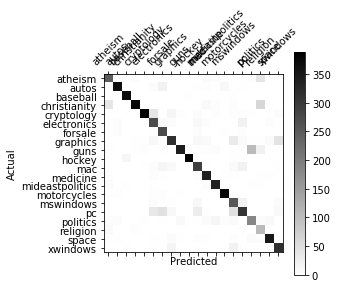

In [170]:
# print(stopResult)
# print(sizes)

# results
for key, value in stopResult.items():
    print(key + ": " + str((value/sizes[key])*100))
    


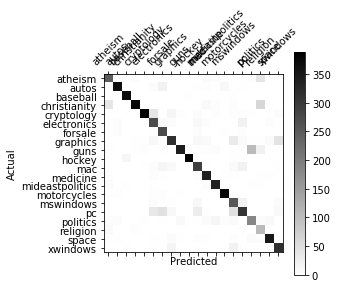

In [171]:
plot_confusion_matrix(stop_confusion)


In [146]:
right, total = processRaw(raw_trained_frame, testFrame, raw_dict, raw_vocab)

print("THE FINAL RESULT IS:")
print(str(right/total) + "% predicated correctly!!")

0
Success! predicted: atheism real: atheism
1
Success! predicted: atheism real: atheism
2
Success! predicted: atheism real: atheism
3
Success! predicted: atheism real: atheism
4
Success! predicted: atheism real: atheism
5
Success! predicted: atheism real: atheism
6
7
Success! predicted: atheism real: atheism
8
Success! predicted: atheism real: atheism
9
Success! predicted: atheism real: atheism
10
Success! predicted: atheism real: atheism
11
Success! predicted: atheism real: atheism
12
Success! predicted: atheism real: atheism
13
Success! predicted: atheism real: atheism
14
Success! predicted: atheism real: atheism
15
Success! predicted: atheism real: atheism
16
Success! predicted: atheism real: atheism
17
Success! predicted: atheism real: atheism
18
19
20
21
Success! predicted: atheism real: atheism
22
Success! predicted: atheism real: atheism
23
Success! predicted: atheism real: atheism
24
Success! predicted: atheism real: atheism
25
Success! predicted: atheism real: atheism
26
Succe

Success! predicted: atheism real: atheism
239
Success! predicted: atheism real: atheism
240
Success! predicted: atheism real: atheism
241
Success! predicted: atheism real: atheism
242
Success! predicted: atheism real: atheism
243
244
Success! predicted: atheism real: atheism
245
Success! predicted: atheism real: atheism
246
Success! predicted: atheism real: atheism
247
248
Success! predicted: atheism real: atheism
249
Success! predicted: atheism real: atheism
250
Success! predicted: atheism real: atheism
251
Success! predicted: atheism real: atheism
252
253
Success! predicted: atheism real: atheism
254
Success! predicted: atheism real: atheism
255
Success! predicted: atheism real: atheism
256
Success! predicted: atheism real: atheism
257
Success! predicted: atheism real: atheism
258
Success! predicted: atheism real: atheism
259
Success! predicted: atheism real: atheism
260
261
Success! predicted: atheism real: atheism
262
Success! predicted: atheism real: atheism
263
Success! predicted

Success! predicted: graphics real: graphics
446
Success! predicted: graphics real: graphics
447
448
Success! predicted: graphics real: graphics
449
Success! predicted: graphics real: graphics
450
Success! predicted: graphics real: graphics
451
Success! predicted: graphics real: graphics
452
Success! predicted: graphics real: graphics
453
Success! predicted: graphics real: graphics
454
Success! predicted: graphics real: graphics
455
Success! predicted: graphics real: graphics
456
457
458
Success! predicted: graphics real: graphics
459
Success! predicted: graphics real: graphics
460
Success! predicted: graphics real: graphics
461
Success! predicted: graphics real: graphics
462
Success! predicted: graphics real: graphics
463
464
Success! predicted: graphics real: graphics
465
Success! predicted: graphics real: graphics
466
Success! predicted: graphics real: graphics
467
Success! predicted: graphics real: graphics
468
469
Success! predicted: graphics real: graphics
470
Success! predicted: 

Success! predicted: graphics real: graphics
673
674
Success! predicted: graphics real: graphics
675
Success! predicted: graphics real: graphics
676
Success! predicted: graphics real: graphics
677
Success! predicted: graphics real: graphics
678
Success! predicted: graphics real: graphics
679
Success! predicted: graphics real: graphics
680
Success! predicted: graphics real: graphics
681
Success! predicted: graphics real: graphics
682
Success! predicted: graphics real: graphics
683
Success! predicted: graphics real: graphics
684
Success! predicted: graphics real: graphics
685
686
Success! predicted: graphics real: graphics
687
Success! predicted: graphics real: graphics
688
Success! predicted: graphics real: graphics
689
690
Success! predicted: graphics real: graphics
691
Success! predicted: graphics real: graphics
692
693
694
695
Success! predicted: graphics real: graphics
696
697
698
Success! predicted: graphics real: graphics
699
700
Success! predicted: graphics real: graphics
701
Succ

908
Success! predicted: mswindows real: mswindows
909
Success! predicted: mswindows real: mswindows
910
Success! predicted: mswindows real: mswindows
911
912
Success! predicted: mswindows real: mswindows
913
914
Success! predicted: mswindows real: mswindows
915
Success! predicted: mswindows real: mswindows
916
917
918
Success! predicted: mswindows real: mswindows
919
920
921
Success! predicted: mswindows real: mswindows
922
923
Success! predicted: mswindows real: mswindows
924
925
Success! predicted: mswindows real: mswindows
926
Success! predicted: mswindows real: mswindows
927
Success! predicted: mswindows real: mswindows
928
Success! predicted: mswindows real: mswindows
929
930
931
Success! predicted: mswindows real: mswindows
932
Success! predicted: mswindows real: mswindows
933
934
935
936
937
938
Success! predicted: mswindows real: mswindows
939
Success! predicted: mswindows real: mswindows
940
Success! predicted: mswindows real: mswindows
941
Success! predicted: mswindows real: 

Success! predicted: pc real: pc
1185
Success! predicted: pc real: pc
1186
Success! predicted: pc real: pc
1187
Success! predicted: pc real: pc
1188
Success! predicted: pc real: pc
1189
Success! predicted: pc real: pc
1190
Success! predicted: pc real: pc
1191
1192
Success! predicted: pc real: pc
1193
Success! predicted: pc real: pc
1194
Success! predicted: pc real: pc
1195
Success! predicted: pc real: pc
1196
Success! predicted: pc real: pc
1197
Success! predicted: pc real: pc
1198
Success! predicted: pc real: pc
1199
Success! predicted: pc real: pc
1200
Success! predicted: pc real: pc
1201
Success! predicted: pc real: pc
1202
1203
Success! predicted: pc real: pc
1204
Success! predicted: pc real: pc
1205
Success! predicted: pc real: pc
1206
Success! predicted: pc real: pc
1207
Success! predicted: pc real: pc
1208
Success! predicted: pc real: pc
1209
Success! predicted: pc real: pc
1210
Success! predicted: pc real: pc
1211
Success! predicted: pc real: pc
1212
Success! predicted: pc real:

Success! predicted: pc real: pc
1454
1455
Success! predicted: pc real: pc
1456
Success! predicted: pc real: pc
1457
Success! predicted: pc real: pc
1458
1459
Success! predicted: pc real: pc
1460
Success! predicted: pc real: pc
1461
1462
Success! predicted: pc real: pc
1463
Success! predicted: pc real: pc
1464
Success! predicted: pc real: pc
1465
Success! predicted: pc real: pc
1466
Success! predicted: pc real: pc
1467
1468
Success! predicted: pc real: pc
1469
Success! predicted: pc real: pc
1470
1471
Success! predicted: pc real: pc
1472
Success! predicted: pc real: pc
1473
Success! predicted: pc real: pc
1474
Success! predicted: pc real: pc
1475
Success! predicted: pc real: pc
1476
Success! predicted: pc real: pc
1477
Success! predicted: pc real: pc
1478
Success! predicted: pc real: pc
1479
1480
Success! predicted: pc real: pc
1481
Success! predicted: pc real: pc
1482
Success! predicted: pc real: pc
1483
Success! predicted: pc real: pc
1484
Success! predicted: pc real: pc
1485
Success!

Success! predicted: mac real: mac
1732
Success! predicted: mac real: mac
1733
Success! predicted: mac real: mac
1734
Success! predicted: mac real: mac
1735
Success! predicted: mac real: mac
1736
Success! predicted: mac real: mac
1737
Success! predicted: mac real: mac
1738
Success! predicted: mac real: mac
1739
1740
Success! predicted: mac real: mac
1741
1742
Success! predicted: mac real: mac
1743
Success! predicted: mac real: mac
1744
Success! predicted: mac real: mac
1745
Success! predicted: mac real: mac
1746
1747
Success! predicted: mac real: mac
1748
Success! predicted: mac real: mac
1749
Success! predicted: mac real: mac
1750
Success! predicted: mac real: mac
1751
Success! predicted: mac real: mac
1752
Success! predicted: mac real: mac
1753
Success! predicted: mac real: mac
1754
Success! predicted: mac real: mac
1755
1756
1757
1758
1759
Success! predicted: mac real: mac
1760
Success! predicted: mac real: mac
1761
1762
Success! predicted: mac real: mac
1763
Success! predicted: mac 

Success! predicted: xwindows real: xwindows
1977
Success! predicted: xwindows real: xwindows
1978
Success! predicted: xwindows real: xwindows
1979
Success! predicted: xwindows real: xwindows
1980
Success! predicted: xwindows real: xwindows
1981
Success! predicted: xwindows real: xwindows
1982
1983
Success! predicted: xwindows real: xwindows
1984
Success! predicted: xwindows real: xwindows
1985
Success! predicted: xwindows real: xwindows
1986
Success! predicted: xwindows real: xwindows
1987
Success! predicted: xwindows real: xwindows
1988
Success! predicted: xwindows real: xwindows
1989
Success! predicted: xwindows real: xwindows
1990
Success! predicted: xwindows real: xwindows
1991
Success! predicted: xwindows real: xwindows
1992
Success! predicted: xwindows real: xwindows
1993
Success! predicted: xwindows real: xwindows
1994
Success! predicted: xwindows real: xwindows
1995
1996
Success! predicted: xwindows real: xwindows
1997
Success! predicted: xwindows real: xwindows
1998
1999
Succe

Success! predicted: xwindows real: xwindows
2180
2181
Success! predicted: xwindows real: xwindows
2182
Success! predicted: xwindows real: xwindows
2183
Success! predicted: xwindows real: xwindows
2184
Success! predicted: xwindows real: xwindows
2185
Success! predicted: xwindows real: xwindows
2186
Success! predicted: xwindows real: xwindows
2187
2188
Success! predicted: xwindows real: xwindows
2189
2190
Success! predicted: xwindows real: xwindows
2191
Success! predicted: xwindows real: xwindows
2192
Success! predicted: xwindows real: xwindows
2193
Success! predicted: xwindows real: xwindows
2194
Success! predicted: xwindows real: xwindows
2195
Success! predicted: xwindows real: xwindows
2196
2197
Success! predicted: xwindows real: xwindows
2198
Success! predicted: xwindows real: xwindows
2199
Success! predicted: xwindows real: xwindows
2200
Success! predicted: xwindows real: xwindows
2201
Success! predicted: xwindows real: xwindows
2202
Success! predicted: xwindows real: xwindows
2203


2417
Success! predicted: forsale real: forsale
2418
Success! predicted: forsale real: forsale
2419
2420
2421
Success! predicted: forsale real: forsale
2422
2423
Success! predicted: forsale real: forsale
2424
2425
Success! predicted: forsale real: forsale
2426
Success! predicted: forsale real: forsale
2427
Success! predicted: forsale real: forsale
2428
Success! predicted: forsale real: forsale
2429
Success! predicted: forsale real: forsale
2430
2431
Success! predicted: forsale real: forsale
2432
Success! predicted: forsale real: forsale
2433
2434
2435
2436
2437
Success! predicted: forsale real: forsale
2438
Success! predicted: forsale real: forsale
2439
2440
Success! predicted: forsale real: forsale
2441
Success! predicted: forsale real: forsale
2442
Success! predicted: forsale real: forsale
2443
2444
2445
Success! predicted: forsale real: forsale
2446
Success! predicted: forsale real: forsale
2447
Success! predicted: forsale real: forsale
2448
Success! predicted: forsale real: forsale


Success! predicted: autos real: autos
2672
Success! predicted: autos real: autos
2673
Success! predicted: autos real: autos
2674
Success! predicted: autos real: autos
2675
Success! predicted: autos real: autos
2676
Success! predicted: autos real: autos
2677
Success! predicted: autos real: autos
2678
Success! predicted: autos real: autos
2679
Success! predicted: autos real: autos
2680
Success! predicted: autos real: autos
2681
Success! predicted: autos real: autos
2682
2683
Success! predicted: autos real: autos
2684
Success! predicted: autos real: autos
2685
Success! predicted: autos real: autos
2686
Success! predicted: autos real: autos
2687
Success! predicted: autos real: autos
2688
Success! predicted: autos real: autos
2689
Success! predicted: autos real: autos
2690
Success! predicted: autos real: autos
2691
Success! predicted: autos real: autos
2692
Success! predicted: autos real: autos
2693
Success! predicted: autos real: autos
2694
Success! predicted: autos real: autos
2695
Succes

Success! predicted: autos real: autos
2878
Success! predicted: autos real: autos
2879
Success! predicted: autos real: autos
2880
Success! predicted: autos real: autos
2881
Success! predicted: autos real: autos
2882
Success! predicted: autos real: autos
2883
Success! predicted: autos real: autos
2884
Success! predicted: autos real: autos
2885
Success! predicted: autos real: autos
2886
Success! predicted: autos real: autos
2887
2888
Success! predicted: autos real: autos
2889
Success! predicted: autos real: autos
2890
Success! predicted: autos real: autos
2891
Success! predicted: autos real: autos
2892
Success! predicted: autos real: autos
2893
Success! predicted: autos real: autos
2894
Success! predicted: autos real: autos
2895
Success! predicted: autos real: autos
2896
Success! predicted: autos real: autos
2897
Success! predicted: autos real: autos
2898
Success! predicted: autos real: autos
2899
Success! predicted: autos real: autos
2900
Success! predicted: autos real: autos
2901
Succes

Success! predicted: motorcycles real: motorcycles
3084
Success! predicted: motorcycles real: motorcycles
3085
Success! predicted: motorcycles real: motorcycles
3086
Success! predicted: motorcycles real: motorcycles
3087
Success! predicted: motorcycles real: motorcycles
3088
Success! predicted: motorcycles real: motorcycles
3089
3090
Success! predicted: motorcycles real: motorcycles
3091
Success! predicted: motorcycles real: motorcycles
3092
Success! predicted: motorcycles real: motorcycles
3093
Success! predicted: motorcycles real: motorcycles
3094
Success! predicted: motorcycles real: motorcycles
3095
Success! predicted: motorcycles real: motorcycles
3096
Success! predicted: motorcycles real: motorcycles
3097
Success! predicted: motorcycles real: motorcycles
3098
Success! predicted: motorcycles real: motorcycles
3099
Success! predicted: motorcycles real: motorcycles
3100
Success! predicted: motorcycles real: motorcycles
3101
3102
Success! predicted: motorcycles real: motorcycles
3103


Success! predicted: motorcycles real: motorcycles
3252
Success! predicted: motorcycles real: motorcycles
3253
Success! predicted: motorcycles real: motorcycles
3254
Success! predicted: motorcycles real: motorcycles
3255
Success! predicted: motorcycles real: motorcycles
3256
Success! predicted: motorcycles real: motorcycles
3257
Success! predicted: motorcycles real: motorcycles
3258
Success! predicted: motorcycles real: motorcycles
3259
Success! predicted: motorcycles real: motorcycles
3260
Success! predicted: motorcycles real: motorcycles
3261
Success! predicted: motorcycles real: motorcycles
3262
Success! predicted: motorcycles real: motorcycles
3263
3264
Success! predicted: motorcycles real: motorcycles
3265
Success! predicted: motorcycles real: motorcycles
3266
Success! predicted: motorcycles real: motorcycles
3267
Success! predicted: motorcycles real: motorcycles
3268
Success! predicted: motorcycles real: motorcycles
3269
Success! predicted: motorcycles real: motorcycles
3270
Succe

Success! predicted: motorcycles real: motorcycles
3413
Success! predicted: motorcycles real: motorcycles
3414
Success! predicted: motorcycles real: motorcycles
3415
3416
Success! predicted: motorcycles real: motorcycles
3417
Success! predicted: motorcycles real: motorcycles
3418
Success! predicted: motorcycles real: motorcycles
3419
Success! predicted: motorcycles real: motorcycles
3420
Success! predicted: motorcycles real: motorcycles
3421
Success! predicted: motorcycles real: motorcycles
3422
Success! predicted: motorcycles real: motorcycles
3423
Success! predicted: motorcycles real: motorcycles
3424
Success! predicted: motorcycles real: motorcycles
3425
Success! predicted: motorcycles real: motorcycles
3426
Success! predicted: motorcycles real: motorcycles
3427
Success! predicted: motorcycles real: motorcycles
3428
3429
Success! predicted: motorcycles real: motorcycles
3430
3431
Success! predicted: motorcycles real: motorcycles
3432
Success! predicted: motorcycles real: motorcycles


Success! predicted: baseball real: baseball
3598
Success! predicted: baseball real: baseball
3599
3600
Success! predicted: baseball real: baseball
3601
Success! predicted: baseball real: baseball
3602
Success! predicted: baseball real: baseball
3603
Success! predicted: baseball real: baseball
3604
Success! predicted: baseball real: baseball
3605
Success! predicted: baseball real: baseball
3606
Success! predicted: baseball real: baseball
3607
Success! predicted: baseball real: baseball
3608
Success! predicted: baseball real: baseball
3609
Success! predicted: baseball real: baseball
3610
Success! predicted: baseball real: baseball
3611
Success! predicted: baseball real: baseball
3612
Success! predicted: baseball real: baseball
3613
Success! predicted: baseball real: baseball
3614
Success! predicted: baseball real: baseball
3615
Success! predicted: baseball real: baseball
3616
Success! predicted: baseball real: baseball
3617
Success! predicted: baseball real: baseball
3618
Success! predic

3785
Success! predicted: baseball real: baseball
3786
Success! predicted: baseball real: baseball
3787
Success! predicted: baseball real: baseball
3788
Success! predicted: baseball real: baseball
3789
Success! predicted: baseball real: baseball
3790
Success! predicted: baseball real: baseball
3791
Success! predicted: baseball real: baseball
3792
Success! predicted: baseball real: baseball
3793
Success! predicted: baseball real: baseball
3794
Success! predicted: baseball real: baseball
3795
Success! predicted: baseball real: baseball
3796
Success! predicted: baseball real: baseball
3797
Success! predicted: baseball real: baseball
3798
Success! predicted: baseball real: baseball
3799
Success! predicted: baseball real: baseball
3800
Success! predicted: baseball real: baseball
3801
3802
Success! predicted: baseball real: baseball
3803
Success! predicted: baseball real: baseball
3804
Success! predicted: baseball real: baseball
3805
Success! predicted: baseball real: baseball
3806
3807
Succe

Success! predicted: hockey real: hockey
3971
Success! predicted: hockey real: hockey
3972
Success! predicted: hockey real: hockey
3973
Success! predicted: hockey real: hockey
3974
Success! predicted: hockey real: hockey
3975
Success! predicted: hockey real: hockey
3976
Success! predicted: hockey real: hockey
3977
Success! predicted: hockey real: hockey
3978
Success! predicted: hockey real: hockey
3979
Success! predicted: hockey real: hockey
3980
Success! predicted: hockey real: hockey
3981
Success! predicted: hockey real: hockey
3982
Success! predicted: hockey real: hockey
3983
Success! predicted: hockey real: hockey
3984
Success! predicted: hockey real: hockey
3985
Success! predicted: hockey real: hockey
3986
Success! predicted: hockey real: hockey
3987
3988
Success! predicted: hockey real: hockey
3989
Success! predicted: hockey real: hockey
3990
Success! predicted: hockey real: hockey
3991
Success! predicted: hockey real: hockey
3992
Success! predicted: hockey real: hockey
3993
Succe

Success! predicted: hockey real: hockey
4159
Success! predicted: hockey real: hockey
4160
Success! predicted: hockey real: hockey
4161
Success! predicted: hockey real: hockey
4162
Success! predicted: hockey real: hockey
4163
Success! predicted: hockey real: hockey
4164
Success! predicted: hockey real: hockey
4165
Success! predicted: hockey real: hockey
4166
Success! predicted: hockey real: hockey
4167
Success! predicted: hockey real: hockey
4168
Success! predicted: hockey real: hockey
4169
Success! predicted: hockey real: hockey
4170
Success! predicted: hockey real: hockey
4171
Success! predicted: hockey real: hockey
4172
Success! predicted: hockey real: hockey
4173
Success! predicted: hockey real: hockey
4174
Success! predicted: hockey real: hockey
4175
Success! predicted: hockey real: hockey
4176
Success! predicted: hockey real: hockey
4177
Success! predicted: hockey real: hockey
4178
Success! predicted: hockey real: hockey
4179
Success! predicted: hockey real: hockey
4180
Success! p

Success! predicted: cryptology real: cryptology
4337
Success! predicted: cryptology real: cryptology
4338
Success! predicted: cryptology real: cryptology
4339
Success! predicted: cryptology real: cryptology
4340
Success! predicted: cryptology real: cryptology
4341
Success! predicted: cryptology real: cryptology
4342
Success! predicted: cryptology real: cryptology
4343
Success! predicted: cryptology real: cryptology
4344
Success! predicted: cryptology real: cryptology
4345
Success! predicted: cryptology real: cryptology
4346
Success! predicted: cryptology real: cryptology
4347
Success! predicted: cryptology real: cryptology
4348
Success! predicted: cryptology real: cryptology
4349
Success! predicted: cryptology real: cryptology
4350
Success! predicted: cryptology real: cryptology
4351
Success! predicted: cryptology real: cryptology
4352
Success! predicted: cryptology real: cryptology
4353
Success! predicted: cryptology real: cryptology
4354
Success! predicted: cryptology real: cryptolog

Success! predicted: cryptology real: cryptology
4505
Success! predicted: cryptology real: cryptology
4506
Success! predicted: cryptology real: cryptology
4507
Success! predicted: cryptology real: cryptology
4508
Success! predicted: cryptology real: cryptology
4509
Success! predicted: cryptology real: cryptology
4510
Success! predicted: cryptology real: cryptology
4511
Success! predicted: cryptology real: cryptology
4512
Success! predicted: cryptology real: cryptology
4513
Success! predicted: cryptology real: cryptology
4514
Success! predicted: cryptology real: cryptology
4515
Success! predicted: cryptology real: cryptology
4516
Success! predicted: cryptology real: cryptology
4517
Success! predicted: cryptology real: cryptology
4518
Success! predicted: cryptology real: cryptology
4519
Success! predicted: cryptology real: cryptology
4520
Success! predicted: cryptology real: cryptology
4521
Success! predicted: cryptology real: cryptology
4522
Success! predicted: cryptology real: cryptolog

Success! predicted: electronics real: electronics
4673
4674
Success! predicted: electronics real: electronics
4675
Success! predicted: electronics real: electronics
4676
Success! predicted: electronics real: electronics
4677
Success! predicted: electronics real: electronics
4678
4679
4680
Success! predicted: electronics real: electronics
4681
Success! predicted: electronics real: electronics
4682
Success! predicted: electronics real: electronics
4683
Success! predicted: electronics real: electronics
4684
4685
Success! predicted: electronics real: electronics
4686
Success! predicted: electronics real: electronics
4687
Success! predicted: electronics real: electronics
4688
4689
4690
Success! predicted: electronics real: electronics
4691
Success! predicted: electronics real: electronics
4692
Success! predicted: electronics real: electronics
4693
4694
Success! predicted: electronics real: electronics
4695
Success! predicted: electronics real: electronics
4696
Success! predicted: electronic

Success! predicted: electronics real: electronics
4885
Success! predicted: electronics real: electronics
4886
Success! predicted: electronics real: electronics
4887
4888
4889
Success! predicted: electronics real: electronics
4890
4891
4892
Success! predicted: electronics real: electronics
4893
Success! predicted: electronics real: electronics
4894
Success! predicted: electronics real: electronics
4895
Success! predicted: electronics real: electronics
4896
Success! predicted: electronics real: electronics
4897
Success! predicted: electronics real: electronics
4898
Success! predicted: electronics real: electronics
4899
Success! predicted: electronics real: electronics
4900
Success! predicted: electronics real: electronics
4901
Success! predicted: electronics real: electronics
4902
Success! predicted: electronics real: electronics
4903
Success! predicted: electronics real: electronics
4904
Success! predicted: electronics real: electronics
4905
4906
4907
Success! predicted: electronics rea

Success! predicted: medicine real: medicine
5087
Success! predicted: medicine real: medicine
5088
Success! predicted: medicine real: medicine
5089
Success! predicted: medicine real: medicine
5090
Success! predicted: medicine real: medicine
5091
Success! predicted: medicine real: medicine
5092
Success! predicted: medicine real: medicine
5093
Success! predicted: medicine real: medicine
5094
Success! predicted: medicine real: medicine
5095
Success! predicted: medicine real: medicine
5096
Success! predicted: medicine real: medicine
5097
Success! predicted: medicine real: medicine
5098
Success! predicted: medicine real: medicine
5099
Success! predicted: medicine real: medicine
5100
Success! predicted: medicine real: medicine
5101
Success! predicted: medicine real: medicine
5102
Success! predicted: medicine real: medicine
5103
Success! predicted: medicine real: medicine
5104
Success! predicted: medicine real: medicine
5105
Success! predicted: medicine real: medicine
5106
Success! predicted: 

Success! predicted: medicine real: medicine
5286
Success! predicted: medicine real: medicine
5287
Success! predicted: medicine real: medicine
5288
Success! predicted: medicine real: medicine
5289
Success! predicted: medicine real: medicine
5290
5291
Success! predicted: medicine real: medicine
5292
Success! predicted: medicine real: medicine
5293
5294
Success! predicted: medicine real: medicine
5295
Success! predicted: medicine real: medicine
5296
Success! predicted: medicine real: medicine
5297
5298
Success! predicted: medicine real: medicine
5299
Success! predicted: medicine real: medicine
5300
Success! predicted: medicine real: medicine
5301
Success! predicted: medicine real: medicine
5302
Success! predicted: medicine real: medicine
5303
Success! predicted: medicine real: medicine
5304
5305
Success! predicted: medicine real: medicine
5306
5307
Success! predicted: medicine real: medicine
5308
5309
Success! predicted: medicine real: medicine
5310
Success! predicted: medicine real: medi

Success! predicted: space real: space
5495
Success! predicted: space real: space
5496
Success! predicted: space real: space
5497
Success! predicted: space real: space
5498
Success! predicted: space real: space
5499
5500
Success! predicted: space real: space
5501
Success! predicted: space real: space
5502
Success! predicted: space real: space
5503
Success! predicted: space real: space
5504
Success! predicted: space real: space
5505
Success! predicted: space real: space
5506
Success! predicted: space real: space
5507
Success! predicted: space real: space
5508
Success! predicted: space real: space
5509
Success! predicted: space real: space
5510
Success! predicted: space real: space
5511
Success! predicted: space real: space
5512
Success! predicted: space real: space
5513
Success! predicted: space real: space
5514
Success! predicted: space real: space
5515
Success! predicted: space real: space
5516
Success! predicted: space real: space
5517
Success! predicted: space real: space
5518
Succes

Success! predicted: space real: space
5705
Success! predicted: space real: space
5706
Success! predicted: space real: space
5707
Success! predicted: space real: space
5708
Success! predicted: space real: space
5709
Success! predicted: space real: space
5710
Success! predicted: space real: space
5711
Success! predicted: space real: space
5712
Success! predicted: space real: space
5713
Success! predicted: space real: space
5714
Success! predicted: space real: space
5715
Success! predicted: space real: space
5716
5717
Success! predicted: space real: space
5718
Success! predicted: space real: space
5719
Success! predicted: space real: space
5720
Success! predicted: space real: space
5721
Success! predicted: space real: space
5722
Success! predicted: space real: space
5723
Success! predicted: space real: space
5724
Success! predicted: space real: space
5725
Success! predicted: space real: space
5726
5727
Success! predicted: space real: space
5728
Success! predicted: space real: space
5729
S

Success! predicted: christianity real: christianity
5900
5901
Success! predicted: christianity real: christianity
5902
Success! predicted: christianity real: christianity
5903
Success! predicted: christianity real: christianity
5904
Success! predicted: christianity real: christianity
5905
Success! predicted: christianity real: christianity
5906
Success! predicted: christianity real: christianity
5907
Success! predicted: christianity real: christianity
5908
Success! predicted: christianity real: christianity
5909
Success! predicted: christianity real: christianity
5910
Success! predicted: christianity real: christianity
5911
Success! predicted: christianity real: christianity
5912
Success! predicted: christianity real: christianity
5913
Success! predicted: christianity real: christianity
5914
Success! predicted: christianity real: christianity
5915
Success! predicted: christianity real: christianity
5916
Success! predicted: christianity real: christianity
5917
Success! predicted: christ

Success! predicted: christianity real: christianity
6049
Success! predicted: christianity real: christianity
6050
Success! predicted: christianity real: christianity
6051
Success! predicted: christianity real: christianity
6052
Success! predicted: christianity real: christianity
6053
Success! predicted: christianity real: christianity
6054
Success! predicted: christianity real: christianity
6055
Success! predicted: christianity real: christianity
6056
Success! predicted: christianity real: christianity
6057
Success! predicted: christianity real: christianity
6058
Success! predicted: christianity real: christianity
6059
Success! predicted: christianity real: christianity
6060
Success! predicted: christianity real: christianity
6061
Success! predicted: christianity real: christianity
6062
Success! predicted: christianity real: christianity
6063
Success! predicted: christianity real: christianity
6064
Success! predicted: christianity real: christianity
6065
Success! predicted: christianit

Success! predicted: christianity real: christianity
6200
Success! predicted: christianity real: christianity
6201
Success! predicted: christianity real: christianity
6202
Success! predicted: christianity real: christianity
6203
Success! predicted: christianity real: christianity
6204
Success! predicted: christianity real: christianity
6205
Success! predicted: christianity real: christianity
6206
Success! predicted: christianity real: christianity
6207
Success! predicted: christianity real: christianity
6208
Success! predicted: christianity real: christianity
6209
Success! predicted: christianity real: christianity
6210
6211
Success! predicted: christianity real: christianity
6212
Success! predicted: christianity real: christianity
6213
Success! predicted: christianity real: christianity
6214
6215
Success! predicted: christianity real: christianity
6216
Success! predicted: christianity real: christianity
6217
Success! predicted: christianity real: christianity
6218
Success! predicted: c

Success! predicted: guns real: guns
6404
Success! predicted: guns real: guns
6405
6406
Success! predicted: guns real: guns
6407
Success! predicted: guns real: guns
6408
Success! predicted: guns real: guns
6409
Success! predicted: guns real: guns
6410
Success! predicted: guns real: guns
6411
Success! predicted: guns real: guns
6412
Success! predicted: guns real: guns
6413
6414
Success! predicted: guns real: guns
6415
Success! predicted: guns real: guns
6416
Success! predicted: guns real: guns
6417
Success! predicted: guns real: guns
6418
Success! predicted: guns real: guns
6419
Success! predicted: guns real: guns
6420
Success! predicted: guns real: guns
6421
Success! predicted: guns real: guns
6422
Success! predicted: guns real: guns
6423
Success! predicted: guns real: guns
6424
Success! predicted: guns real: guns
6425
Success! predicted: guns real: guns
6426
Success! predicted: guns real: guns
6427
Success! predicted: guns real: guns
6428
6429
Success! predicted: guns real: guns
6430
S

Success! predicted: mideastpolitics real: mideastpolitics
6611
Success! predicted: mideastpolitics real: mideastpolitics
6612
Success! predicted: mideastpolitics real: mideastpolitics
6613
Success! predicted: mideastpolitics real: mideastpolitics
6614
Success! predicted: mideastpolitics real: mideastpolitics
6615
Success! predicted: mideastpolitics real: mideastpolitics
6616
Success! predicted: mideastpolitics real: mideastpolitics
6617
Success! predicted: mideastpolitics real: mideastpolitics
6618
Success! predicted: mideastpolitics real: mideastpolitics
6619
Success! predicted: mideastpolitics real: mideastpolitics
6620
Success! predicted: mideastpolitics real: mideastpolitics
6621
Success! predicted: mideastpolitics real: mideastpolitics
6622
Success! predicted: mideastpolitics real: mideastpolitics
6623
6624
Success! predicted: mideastpolitics real: mideastpolitics
6625
Success! predicted: mideastpolitics real: mideastpolitics
6626
Success! predicted: mideastpolitics real: mideastp

6765
Success! predicted: mideastpolitics real: mideastpolitics
6766
Success! predicted: mideastpolitics real: mideastpolitics
6767
Success! predicted: mideastpolitics real: mideastpolitics
6768
Success! predicted: mideastpolitics real: mideastpolitics
6769
Success! predicted: mideastpolitics real: mideastpolitics
6770
Success! predicted: mideastpolitics real: mideastpolitics
6771
Success! predicted: mideastpolitics real: mideastpolitics
6772
Success! predicted: mideastpolitics real: mideastpolitics
6773
Success! predicted: mideastpolitics real: mideastpolitics
6774
Success! predicted: mideastpolitics real: mideastpolitics
6775
Success! predicted: mideastpolitics real: mideastpolitics
6776
Success! predicted: mideastpolitics real: mideastpolitics
6777
Success! predicted: mideastpolitics real: mideastpolitics
6778
Success! predicted: mideastpolitics real: mideastpolitics
6779
Success! predicted: mideastpolitics real: mideastpolitics
6780
Success! predicted: mideastpolitics real: mideastp

Success! predicted: mideastpolitics real: mideastpolitics
6908
Success! predicted: mideastpolitics real: mideastpolitics
6909
Success! predicted: mideastpolitics real: mideastpolitics
6910
Success! predicted: mideastpolitics real: mideastpolitics
6911
6912
Success! predicted: mideastpolitics real: mideastpolitics
6913
Success! predicted: mideastpolitics real: mideastpolitics
6914
Success! predicted: mideastpolitics real: mideastpolitics
6915
Success! predicted: mideastpolitics real: mideastpolitics
6916
Success! predicted: mideastpolitics real: mideastpolitics
6917
Success! predicted: mideastpolitics real: mideastpolitics
6918
Success! predicted: mideastpolitics real: mideastpolitics
6919
Success! predicted: mideastpolitics real: mideastpolitics
6920
Success! predicted: mideastpolitics real: mideastpolitics
6921
Success! predicted: mideastpolitics real: mideastpolitics
6922
Success! predicted: mideastpolitics real: mideastpolitics
6923
Success! predicted: mideastpolitics real: mideastp

7133
Success! predicted: politics real: politics
7134
Success! predicted: politics real: politics
7135
Success! predicted: politics real: politics
7136
Success! predicted: politics real: politics
7137
Success! predicted: politics real: politics
7138
Success! predicted: politics real: politics
7139
Success! predicted: politics real: politics
7140
Success! predicted: politics real: politics
7141
Success! predicted: politics real: politics
7142
Success! predicted: politics real: politics
7143
7144
Success! predicted: politics real: politics
7145
Success! predicted: politics real: politics
7146
Success! predicted: politics real: politics
7147
Success! predicted: politics real: politics
7148
Success! predicted: politics real: politics
7149
Success! predicted: politics real: politics
7150
Success! predicted: politics real: politics
7151
Success! predicted: politics real: politics
7152
Success! predicted: politics real: politics
7153
7154
Success! predicted: politics real: politics
7155
Succe

7437
Success! predicted: religion real: religion
7438
7439
Success! predicted: religion real: religion
7440
7441
Success! predicted: religion real: religion
7442
Success! predicted: religion real: religion
7443
Success! predicted: religion real: religion
7444
Success! predicted: religion real: religion
7445
Success! predicted: religion real: religion
7446
Success! predicted: religion real: religion
7447
7448
Success! predicted: religion real: religion
7449
7450
7451
7452
7453
Success! predicted: religion real: religion
7454
7455
7456
7457
Success! predicted: religion real: religion
7458
7459
7460
Success! predicted: religion real: religion
7461
Success! predicted: religion real: religion
7462
7463
7464
7465
7466
7467
Success! predicted: religion real: religion
7468
Success! predicted: religion real: religion
7469
Success! predicted: religion real: religion
7470
7471
7472
7473
7474
7475
7476
Success! predicted: religion real: religion
7477
7478
7479
7480
7481
7482
Success! predicted: re

In [147]:
# print(stopResult)
# print(sizes)

# results
for key, value in rawResult.items():
    print(key + ": " + str((value/sizes[key])*100))
    


medicine: 83.33333333333334
christianity: 95.47738693467338
xwindows: 80.35714285714286
autos: 92.40506329113924
mac: 72.98701298701299
graphics: 78.1491002570694
atheism: 76.17554858934169
forsale: 62.56410256410256
pc: 79.59183673469387
hockey: 96.99248120300751
mswindows: 61.32315521628499
baseball: 88.66498740554157
mideastpolitics: 87.7659574468085
politics: 58.387096774193544
guns: 92.85714285714286
religion: 36.254980079681275
electronics: 68.70229007633588
cryptology: 93.93939393939394
motorcycles: 91.20603015075378
space: 86.29441624365482


In [149]:
right, total = processStem(stem_trained_frame, testFrame, stem_dict, stem_vocab)

print("THE FINAL RESULT IS:")
print(str(right/total) + "% predicated correctly!!")

0
Success! predicted: atheism real: atheism
1
1
Success! predicted: atheism real: atheism
2
2
Success! predicted: atheism real: atheism
3
3
Success! predicted: atheism real: atheism
4
4
Success! predicted: atheism real: atheism
5
5
Success! predicted: atheism real: atheism
6
6
7
Success! predicted: atheism real: atheism
7
8
Success! predicted: atheism real: atheism
8
9
Success! predicted: atheism real: atheism
9
10
Success! predicted: atheism real: atheism
10
11
Success! predicted: atheism real: atheism
11
12
Success! predicted: atheism real: atheism
12
13
Success! predicted: atheism real: atheism
13
14
Success! predicted: atheism real: atheism
14
15
Success! predicted: atheism real: atheism
15
16
Success! predicted: atheism real: atheism
16
17
Success! predicted: atheism real: atheism
17
18
19
20
21
Success! predicted: atheism real: atheism
18
22
Success! predicted: atheism real: atheism
19
23
Success! predicted: atheism real: atheism
20
24
Success! predicted: atheism real: atheism
21

228
Success! predicted: atheism real: atheism
166
229
Success! predicted: atheism real: atheism
167
230
Success! predicted: atheism real: atheism
168
231
Success! predicted: atheism real: atheism
169
232
Success! predicted: atheism real: atheism
170
233
Success! predicted: atheism real: atheism
171
234
Success! predicted: atheism real: atheism
172
235
Success! predicted: atheism real: atheism
173
236
237
Success! predicted: atheism real: atheism
174
238
Success! predicted: atheism real: atheism
175
239
Success! predicted: atheism real: atheism
176
240
241
Success! predicted: atheism real: atheism
177
242
Success! predicted: atheism real: atheism
178
243
244
Success! predicted: atheism real: atheism
179
245
Success! predicted: atheism real: atheism
180
246
Success! predicted: atheism real: atheism
181
247
248
Success! predicted: atheism real: atheism
182
249
Success! predicted: atheism real: atheism
183
250
Success! predicted: atheism real: atheism
184
251
Success! predicted: atheism re

Success! predicted: graphics real: graphics
93
424
Success! predicted: graphics real: graphics
94
425
Success! predicted: graphics real: graphics
95
426
Success! predicted: graphics real: graphics
96
427
Success! predicted: graphics real: graphics
97
428
Success! predicted: graphics real: graphics
98
429
Success! predicted: graphics real: graphics
99
430
Success! predicted: graphics real: graphics
100
431
Success! predicted: graphics real: graphics
101
432
Success! predicted: graphics real: graphics
102
433
Success! predicted: graphics real: graphics
103
434
Success! predicted: graphics real: graphics
104
435
Success! predicted: graphics real: graphics
105
436
Success! predicted: graphics real: graphics
106
437
438
Success! predicted: graphics real: graphics
107
439
Success! predicted: graphics real: graphics
108
440
Success! predicted: graphics real: graphics
109
441
Success! predicted: graphics real: graphics
110
442
Success! predicted: graphics real: graphics
111
443
444
Success! pr

Success! predicted: graphics real: graphics
248
626
Success! predicted: graphics real: graphics
249
627
628
Success! predicted: graphics real: graphics
250
629
Success! predicted: graphics real: graphics
251
630
631
632
Success! predicted: graphics real: graphics
252
633
634
Success! predicted: graphics real: graphics
253
635
636
637
Success! predicted: graphics real: graphics
254
638
Success! predicted: graphics real: graphics
255
639
Success! predicted: graphics real: graphics
256
640
641
Success! predicted: graphics real: graphics
257
642
Success! predicted: graphics real: graphics
258
643
Success! predicted: graphics real: graphics
259
644
Success! predicted: graphics real: graphics
260
645
Success! predicted: graphics real: graphics
261
646
647
648
Success! predicted: graphics real: graphics
262
649
650
Success! predicted: graphics real: graphics
263
651
Success! predicted: graphics real: graphics
264
652
Success! predicted: graphics real: graphics
265
653
654
Success! predicted: 

Success! predicted: mswindows real: mswindows
91
867
868
869
870
Success! predicted: mswindows real: mswindows
92
871
Success! predicted: mswindows real: mswindows
93
872
Success! predicted: mswindows real: mswindows
94
873
Success! predicted: mswindows real: mswindows
95
874
Success! predicted: mswindows real: mswindows
96
875
876
Success! predicted: mswindows real: mswindows
97
877
Success! predicted: mswindows real: mswindows
98
878
Success! predicted: mswindows real: mswindows
99
879
880
Success! predicted: mswindows real: mswindows
100
881
882
Success! predicted: mswindows real: mswindows
101
883
884
Success! predicted: mswindows real: mswindows
102
885
886
Success! predicted: mswindows real: mswindows
103
887
Success! predicted: mswindows real: mswindows
104
888
Success! predicted: mswindows real: mswindows
105
889
Success! predicted: mswindows real: mswindows
106
890
Success! predicted: mswindows real: mswindows
107
891
892
893
Success! predicted: mswindows real: mswindows
108
8

Success! predicted: pc real: pc
33
1146
Success! predicted: pc real: pc
34
1147
Success! predicted: pc real: pc
35
1148
Success! predicted: pc real: pc
36
1149
Success! predicted: pc real: pc
37
1150
1151
Success! predicted: pc real: pc
38
1152
1153
Success! predicted: pc real: pc
39
1154
Success! predicted: pc real: pc
40
1155
Success! predicted: pc real: pc
41
1156
Success! predicted: pc real: pc
42
1157
Success! predicted: pc real: pc
43
1158
Success! predicted: pc real: pc
44
1159
Success! predicted: pc real: pc
45
1160
1161
1162
Success! predicted: pc real: pc
46
1163
1164
Success! predicted: pc real: pc
47
1165
Success! predicted: pc real: pc
48
1166
Success! predicted: pc real: pc
49
1167
Success! predicted: pc real: pc
50
1168
1169
Success! predicted: pc real: pc
51
1170
1171
Success! predicted: pc real: pc
52
1172
1173
Success! predicted: pc real: pc
53
1174
Success! predicted: pc real: pc
54
1175
Success! predicted: pc real: pc
55
1176
Success! predicted: pc real: pc
56
1177


1400
Success! predicted: pc real: pc
228
1401
Success! predicted: pc real: pc
229
1402
Success! predicted: pc real: pc
230
1403
Success! predicted: pc real: pc
231
1404
Success! predicted: pc real: pc
232
1405
Success! predicted: pc real: pc
233
1406
Success! predicted: pc real: pc
234
1407
1408
Success! predicted: pc real: pc
235
1409
Success! predicted: pc real: pc
236
1410
1411
Success! predicted: pc real: pc
237
1412
Success! predicted: pc real: pc
238
1413
Success! predicted: pc real: pc
239
1414
Success! predicted: pc real: pc
240
1415
Success! predicted: pc real: pc
241
1416
Success! predicted: pc real: pc
242
1417
Success! predicted: pc real: pc
243
1418
1419
1420
1421
Success! predicted: pc real: pc
244
1422
Success! predicted: pc real: pc
245
1423
Success! predicted: pc real: pc
246
1424
1425
Success! predicted: pc real: pc
247
1426
1427
Success! predicted: pc real: pc
248
1428
Success! predicted: pc real: pc
249
1429
Success! predicted: pc real: pc
250
1430
Success! predicte

Success! predicted: mac real: mac
117
1651
Success! predicted: mac real: mac
118
1652
Success! predicted: mac real: mac
119
1653
1654
Success! predicted: mac real: mac
120
1655
Success! predicted: mac real: mac
121
1656
Success! predicted: mac real: mac
122
1657
Success! predicted: mac real: mac
123
1658
Success! predicted: mac real: mac
124
1659
Success! predicted: mac real: mac
125
1660
Success! predicted: mac real: mac
126
1661
Success! predicted: mac real: mac
127
1662
Success! predicted: mac real: mac
128
1663
1664
1665
Success! predicted: mac real: mac
129
1666
1667
Success! predicted: mac real: mac
130
1668
1669
Success! predicted: mac real: mac
131
1670
Success! predicted: mac real: mac
132
1671
Success! predicted: mac real: mac
133
1672
1673
Success! predicted: mac real: mac
134
1674
Success! predicted: mac real: mac
135
1675
Success! predicted: mac real: mac
136
1676
Success! predicted: mac real: mac
137
1677
1678
Success! predicted: mac real: mac
138
1679
Success! predicted:

Success! predicted: xwindows real: xwindows
17
1899
1900
Success! predicted: xwindows real: xwindows
18
1901
Success! predicted: xwindows real: xwindows
19
1902
Success! predicted: xwindows real: xwindows
20
1903
Success! predicted: xwindows real: xwindows
21
1904
1905
Success! predicted: xwindows real: xwindows
22
1906
Success! predicted: xwindows real: xwindows
23
1907
1908
Success! predicted: xwindows real: xwindows
24
1909
Success! predicted: xwindows real: xwindows
25
1910
Success! predicted: xwindows real: xwindows
26
1911
Success! predicted: xwindows real: xwindows
27
1912
Success! predicted: xwindows real: xwindows
28
1913
Success! predicted: xwindows real: xwindows
29
1914
Success! predicted: xwindows real: xwindows
30
1915
Success! predicted: xwindows real: xwindows
31
1916
Success! predicted: xwindows real: xwindows
32
1917
Success! predicted: xwindows real: xwindows
33
1918
Success! predicted: xwindows real: xwindows
34
1919
Success! predicted: xwindows real: xwindows
35
19

Success! predicted: xwindows real: xwindows
170
2092
2093
Success! predicted: xwindows real: xwindows
171
2094
Success! predicted: xwindows real: xwindows
172
2095
Success! predicted: xwindows real: xwindows
173
2096
Success! predicted: xwindows real: xwindows
174
2097
Success! predicted: xwindows real: xwindows
175
2098
Success! predicted: xwindows real: xwindows
176
2099
2100
Success! predicted: xwindows real: xwindows
177
2101
Success! predicted: xwindows real: xwindows
178
2102
Success! predicted: xwindows real: xwindows
179
2103
Success! predicted: xwindows real: xwindows
180
2104
2105
Success! predicted: xwindows real: xwindows
181
2106
Success! predicted: xwindows real: xwindows
182
2107
2108
Success! predicted: xwindows real: xwindows
183
2109
Success! predicted: xwindows real: xwindows
184
2110
Success! predicted: xwindows real: xwindows
185
2111
Success! predicted: xwindows real: xwindows
186
2112
Success! predicted: xwindows real: xwindows
187
2113
Success! predicted: xwindo

Success! predicted: forsale real: forsale
4
2284
Success! predicted: forsale real: forsale
5
2285
2286
Success! predicted: forsale real: forsale
6
2287
Success! predicted: forsale real: forsale
7
2288
Success! predicted: forsale real: forsale
8
2289
2290
Success! predicted: forsale real: forsale
9
2291
Success! predicted: forsale real: forsale
10
2292
Success! predicted: forsale real: forsale
11
2293
2294
2295
Success! predicted: forsale real: forsale
12
2296
2297
2298
Success! predicted: forsale real: forsale
13
2299
2300
Success! predicted: forsale real: forsale
14
2301
2302
2303
2304
Success! predicted: forsale real: forsale
15
2305
Success! predicted: forsale real: forsale
16
2306
Success! predicted: forsale real: forsale
17
2307
2308
2309
Success! predicted: forsale real: forsale
18
2310
2311
Success! predicted: forsale real: forsale
19
2312
Success! predicted: forsale real: forsale
20
2313
2314
Success! predicted: forsale real: forsale
21
2315
2316
2317
2318
Success! predicted: f

2555
2556
Success! predicted: forsale real: forsale
156
2557
Success! predicted: forsale real: forsale
157
2558
Success! predicted: forsale real: forsale
158
2559
Success! predicted: forsale real: forsale
159
2560
2561
2562
Success! predicted: forsale real: forsale
160
2563
Success! predicted: forsale real: forsale
161
2564
2565
Success! predicted: forsale real: forsale
162
2566
Success! predicted: forsale real: forsale
163
2567
Success! predicted: forsale real: forsale
164
2568
Success! predicted: forsale real: forsale
165
2569
2570
2571
Success! predicted: forsale real: forsale
166
2572
2573
2574
Success! predicted: forsale real: forsale
167
2575
Success! predicted: forsale real: forsale
168
2576
2577
Success! predicted: forsale real: forsale
169
2578
Success! predicted: forsale real: forsale
170
2579
2580
Success! predicted: forsale real: forsale
171
2581
2582
2583
2584
2585
Success! predicted: forsale real: forsale
172
2586
Success! predicted: forsale real: forsale
173
2587
2588
Su

Success! predicted: autos real: autos
108
2778
Success! predicted: autos real: autos
109
2779
Success! predicted: autos real: autos
110
2780
Success! predicted: autos real: autos
111
2781
Success! predicted: autos real: autos
112
2782
Success! predicted: autos real: autos
113
2783
Success! predicted: autos real: autos
114
2784
Success! predicted: autos real: autos
115
2785
2786
Success! predicted: autos real: autos
116
2787
Success! predicted: autos real: autos
117
2788
Success! predicted: autos real: autos
118
2789
Success! predicted: autos real: autos
119
2790
Success! predicted: autos real: autos
120
2791
Success! predicted: autos real: autos
121
2792
Success! predicted: autos real: autos
122
2793
Success! predicted: autos real: autos
123
2794
Success! predicted: autos real: autos
124
2795
Success! predicted: autos real: autos
125
2796
Success! predicted: autos real: autos
126
2797
Success! predicted: autos real: autos
127
2798
Success! predicted: autos real: autos
128
2799
Success!

Success! predicted: autos real: autos
283
2970
Success! predicted: autos real: autos
284
2971
Success! predicted: autos real: autos
285
2972
Success! predicted: autos real: autos
286
2973
Success! predicted: autos real: autos
287
2974
Success! predicted: autos real: autos
288
2975
Success! predicted: autos real: autos
289
2976
Success! predicted: autos real: autos
290
2977
Success! predicted: autos real: autos
291
2978
Success! predicted: autos real: autos
292
2979
Success! predicted: autos real: autos
293
2980
Success! predicted: autos real: autos
294
2981
Success! predicted: autos real: autos
295
2982
Success! predicted: autos real: autos
296
2983
2984
Success! predicted: autos real: autos
297
2985
Success! predicted: autos real: autos
298
2986
Success! predicted: autos real: autos
299
2987
Success! predicted: autos real: autos
300
2988
Success! predicted: autos real: autos
301
2989
Success! predicted: autos real: autos
302
2990
Success! predicted: autos real: autos
303
2991
Success!

Success! predicted: motorcycles real: motorcycles
74
3139
Success! predicted: motorcycles real: motorcycles
75
3140
Success! predicted: motorcycles real: motorcycles
76
3141
Success! predicted: motorcycles real: motorcycles
77
3142
Success! predicted: motorcycles real: motorcycles
78
3143
Success! predicted: motorcycles real: motorcycles
79
3144
Success! predicted: motorcycles real: motorcycles
80
3145
Success! predicted: motorcycles real: motorcycles
81
3146
Success! predicted: motorcycles real: motorcycles
82
3147
Success! predicted: motorcycles real: motorcycles
83
3148
Success! predicted: motorcycles real: motorcycles
84
3149
Success! predicted: motorcycles real: motorcycles
85
3150
Success! predicted: motorcycles real: motorcycles
86
3151
Success! predicted: motorcycles real: motorcycles
87
3152
Success! predicted: motorcycles real: motorcycles
88
3153
Success! predicted: motorcycles real: motorcycles
89
3154
Success! predicted: motorcycles real: motorcycles
90
3155
Success! predi

Success! predicted: motorcycles real: motorcycles
214
3289
Success! predicted: motorcycles real: motorcycles
215
3290
Success! predicted: motorcycles real: motorcycles
216
3291
Success! predicted: motorcycles real: motorcycles
217
3292
Success! predicted: motorcycles real: motorcycles
218
3293
Success! predicted: motorcycles real: motorcycles
219
3294
Success! predicted: motorcycles real: motorcycles
220
3295
Success! predicted: motorcycles real: motorcycles
221
3296
Success! predicted: motorcycles real: motorcycles
222
3297
Success! predicted: motorcycles real: motorcycles
223
3298
Success! predicted: motorcycles real: motorcycles
224
3299
Success! predicted: motorcycles real: motorcycles
225
3300
Success! predicted: motorcycles real: motorcycles
226
3301
Success! predicted: motorcycles real: motorcycles
227
3302
Success! predicted: motorcycles real: motorcycles
228
3303
Success! predicted: motorcycles real: motorcycles
229
3304
Success! predicted: motorcycles real: motorcycles
230
33

Success! predicted: motorcycles real: motorcycles
352
3443
Success! predicted: motorcycles real: motorcycles
353
3444
Success! predicted: motorcycles real: motorcycles
354
3445
Success! predicted: motorcycles real: motorcycles
355
3446
Success! predicted: motorcycles real: motorcycles
356
3447
3448
3449
Success! predicted: motorcycles real: motorcycles
357
3450
3451
3452
3453
Success! predicted: motorcycles real: motorcycles
358
3454
Success! predicted: baseball real: baseball
1
3455
Success! predicted: baseball real: baseball
2
3456
Success! predicted: baseball real: baseball
3
3457
Success! predicted: baseball real: baseball
4
3458
Success! predicted: baseball real: baseball
5
3459
Success! predicted: baseball real: baseball
6
3460
Success! predicted: baseball real: baseball
7
3461
Success! predicted: baseball real: baseball
8
3462
3463
Success! predicted: baseball real: baseball
9
3464
Success! predicted: baseball real: baseball
10
3465
Success! predicted: baseball real: baseball
11

Success! predicted: baseball real: baseball
150
3626
Success! predicted: baseball real: baseball
151
3627
Success! predicted: baseball real: baseball
152
3628
Success! predicted: baseball real: baseball
153
3629
3630
Success! predicted: baseball real: baseball
154
3631
Success! predicted: baseball real: baseball
155
3632
Success! predicted: baseball real: baseball
156
3633
Success! predicted: baseball real: baseball
157
3634
Success! predicted: baseball real: baseball
158
3635
Success! predicted: baseball real: baseball
159
3636
Success! predicted: baseball real: baseball
160
3637
Success! predicted: baseball real: baseball
161
3638
Success! predicted: baseball real: baseball
162
3639
3640
Success! predicted: baseball real: baseball
163
3641
Success! predicted: baseball real: baseball
164
3642
Success! predicted: baseball real: baseball
165
3643
Success! predicted: baseball real: baseball
166
3644
Success! predicted: baseball real: baseball
167
3645
3646
Success! predicted: baseball re

Success! predicted: baseball real: baseball
303
3797
Success! predicted: baseball real: baseball
304
3798
Success! predicted: baseball real: baseball
305
3799
Success! predicted: baseball real: baseball
306
3800
Success! predicted: baseball real: baseball
307
3801
3802
Success! predicted: baseball real: baseball
308
3803
Success! predicted: baseball real: baseball
309
3804
Success! predicted: baseball real: baseball
310
3805
Success! predicted: baseball real: baseball
311
3806
Success! predicted: baseball real: baseball
312
3807
Success! predicted: baseball real: baseball
313
3808
3809
Success! predicted: baseball real: baseball
314
3810
3811
Success! predicted: baseball real: baseball
315
3812
Success! predicted: baseball real: baseball
316
3813
Success! predicted: baseball real: baseball
317
3814
Success! predicted: baseball real: baseball
318
3815
Success! predicted: baseball real: baseball
319
3816
Success! predicted: baseball real: baseball
320
3817
3818
Success! predicted: baseba

Success! predicted: hockey real: hockey
121
3974
Success! predicted: hockey real: hockey
122
3975
Success! predicted: hockey real: hockey
123
3976
Success! predicted: hockey real: hockey
124
3977
Success! predicted: hockey real: hockey
125
3978
Success! predicted: hockey real: hockey
126
3979
Success! predicted: hockey real: hockey
127
3980
Success! predicted: hockey real: hockey
128
3981
Success! predicted: hockey real: hockey
129
3982
Success! predicted: hockey real: hockey
130
3983
Success! predicted: hockey real: hockey
131
3984
Success! predicted: hockey real: hockey
132
3985
Success! predicted: hockey real: hockey
133
3986
Success! predicted: hockey real: hockey
134
3987
3988
Success! predicted: hockey real: hockey
135
3989
Success! predicted: hockey real: hockey
136
3990
Success! predicted: hockey real: hockey
137
3991
Success! predicted: hockey real: hockey
138
3992
Success! predicted: hockey real: hockey
139
3993
Success! predicted: hockey real: hockey
140
3994
Success! predic

Success! predicted: hockey real: hockey
288
4148
Success! predicted: hockey real: hockey
289
4149
Success! predicted: hockey real: hockey
290
4150
Success! predicted: hockey real: hockey
291
4151
Success! predicted: hockey real: hockey
292
4152
Success! predicted: hockey real: hockey
293
4153
Success! predicted: hockey real: hockey
294
4154
Success! predicted: hockey real: hockey
295
4155
Success! predicted: hockey real: hockey
296
4156
Success! predicted: hockey real: hockey
297
4157
Success! predicted: hockey real: hockey
298
4158
Success! predicted: hockey real: hockey
299
4159
Success! predicted: hockey real: hockey
300
4160
Success! predicted: hockey real: hockey
301
4161
Success! predicted: hockey real: hockey
302
4162
Success! predicted: hockey real: hockey
303
4163
Success! predicted: hockey real: hockey
304
4164
Success! predicted: hockey real: hockey
305
4165
Success! predicted: hockey real: hockey
306
4166
Success! predicted: hockey real: hockey
307
4167
Success! predicted: 

Success! predicted: cryptology real: cryptology
61
4314
Success! predicted: cryptology real: cryptology
62
4315
Success! predicted: cryptology real: cryptology
63
4316
Success! predicted: cryptology real: cryptology
64
4317
Success! predicted: cryptology real: cryptology
65
4318
Success! predicted: cryptology real: cryptology
66
4319
Success! predicted: cryptology real: cryptology
67
4320
Success! predicted: cryptology real: cryptology
68
4321
Success! predicted: cryptology real: cryptology
69
4322
Success! predicted: cryptology real: cryptology
70
4323
Success! predicted: cryptology real: cryptology
71
4324
Success! predicted: cryptology real: cryptology
72
4325
Success! predicted: cryptology real: cryptology
73
4326
Success! predicted: cryptology real: cryptology
74
4327
Success! predicted: cryptology real: cryptology
75
4328
Success! predicted: cryptology real: cryptology
76
4329
Success! predicted: cryptology real: cryptology
77
4330
Success! predicted: cryptology real: cryptology


4467
4468
Success! predicted: cryptology real: cryptology
206
4469
Success! predicted: cryptology real: cryptology
207
4470
Success! predicted: cryptology real: cryptology
208
4471
Success! predicted: cryptology real: cryptology
209
4472
Success! predicted: cryptology real: cryptology
210
4473
Success! predicted: cryptology real: cryptology
211
4474
Success! predicted: cryptology real: cryptology
212
4475
Success! predicted: cryptology real: cryptology
213
4476
Success! predicted: cryptology real: cryptology
214
4477
Success! predicted: cryptology real: cryptology
215
4478
Success! predicted: cryptology real: cryptology
216
4479
Success! predicted: cryptology real: cryptology
217
4480
Success! predicted: cryptology real: cryptology
218
4481
Success! predicted: cryptology real: cryptology
219
4482
Success! predicted: cryptology real: cryptology
220
4483
Success! predicted: cryptology real: cryptology
221
4484
Success! predicted: cryptology real: cryptology
222
4485
Success! predicted: c

Success! predicted: cryptology real: cryptology
350
4622
Success! predicted: cryptology real: cryptology
351
4623
Success! predicted: cryptology real: cryptology
352
4624
Success! predicted: cryptology real: cryptology
353
4625
Success! predicted: cryptology real: cryptology
354
4626
Success! predicted: cryptology real: cryptology
355
4627
Success! predicted: cryptology real: cryptology
356
4628
Success! predicted: cryptology real: cryptology
357
4629
Success! predicted: cryptology real: cryptology
358
4630
Success! predicted: cryptology real: cryptology
359
4631
Success! predicted: cryptology real: cryptology
360
4632
Success! predicted: cryptology real: cryptology
361
4633
Success! predicted: cryptology real: cryptology
362
4634
Success! predicted: cryptology real: cryptology
363
4635
Success! predicted: cryptology real: cryptology
364
4636
Success! predicted: cryptology real: cryptology
365
4637
Success! predicted: cryptology real: cryptology
366
4638
Success! predicted: cryptology 

Success! predicted: electronics real: electronics
116
4810
4811
Success! predicted: electronics real: electronics
117
4812
Success! predicted: electronics real: electronics
118
4813
Success! predicted: electronics real: electronics
119
4814
Success! predicted: electronics real: electronics
120
4815
Success! predicted: electronics real: electronics
121
4816
Success! predicted: electronics real: electronics
122
4817
4818
Success! predicted: electronics real: electronics
123
4819
Success! predicted: electronics real: electronics
124
4820
4821
4822
4823
4824
Success! predicted: electronics real: electronics
125
4825
Success! predicted: electronics real: electronics
126
4826
4827
Success! predicted: electronics real: electronics
127
4828
Success! predicted: electronics real: electronics
128
4829
Success! predicted: electronics real: electronics
129
4830
Success! predicted: electronics real: electronics
130
4831
4832
Success! predicted: electronics real: electronics
131
4833
4834
Success! pr

Success! predicted: electronics real: electronics
250
5010
Success! predicted: electronics real: electronics
251
5011
Success! predicted: electronics real: electronics
252
5012
Success! predicted: electronics real: electronics
253
5013
5014
5015
Success! predicted: electronics real: electronics
254
5016
Success! predicted: electronics real: electronics
255
5017
Success! predicted: electronics real: electronics
256
5018
Success! predicted: electronics real: electronics
257
5019
Success! predicted: electronics real: electronics
258
5020
Success! predicted: electronics real: electronics
259
5021
5022
Success! predicted: electronics real: electronics
260
5023
Success! predicted: electronics real: electronics
261
5024
Success! predicted: electronics real: electronics
262
5025
Success! predicted: electronics real: electronics
263
5026
5027
5028
Success! predicted: electronics real: electronics
264
5029
Success! predicted: electronics real: electronics
265
5030
5031
Success! predicted: electr

5188
5189
5190
Success! predicted: medicine real: medicine
131
5191
Success! predicted: medicine real: medicine
132
5192
5193
Success! predicted: medicine real: medicine
133
5194
5195
Success! predicted: medicine real: medicine
134
5196
Success! predicted: medicine real: medicine
135
5197
5198
5199
5200
Success! predicted: medicine real: medicine
136
5201
Success! predicted: medicine real: medicine
137
5202
Success! predicted: medicine real: medicine
138
5203
Success! predicted: medicine real: medicine
139
5204
Success! predicted: medicine real: medicine
140
5205
Success! predicted: medicine real: medicine
141
5206
Success! predicted: medicine real: medicine
142
5207
Success! predicted: medicine real: medicine
143
5208
Success! predicted: medicine real: medicine
144
5209
Success! predicted: medicine real: medicine
145
5210
Success! predicted: medicine real: medicine
146
5211
Success! predicted: medicine real: medicine
147
5212
Success! predicted: medicine real: medicine
148
5213
Succes

Success! predicted: medicine real: medicine
283
5369
Success! predicted: medicine real: medicine
284
5370
5371
Success! predicted: medicine real: medicine
285
5372
Success! predicted: medicine real: medicine
286
5373
Success! predicted: medicine real: medicine
287
5374
Success! predicted: medicine real: medicine
288
5375
Success! predicted: medicine real: medicine
289
5376
Success! predicted: medicine real: medicine
290
5377
Success! predicted: medicine real: medicine
291
5378
Success! predicted: medicine real: medicine
292
5379
Success! predicted: medicine real: medicine
293
5380
Success! predicted: medicine real: medicine
294
5381
Success! predicted: medicine real: medicine
295
5382
Success! predicted: medicine real: medicine
296
5383
Success! predicted: medicine real: medicine
297
5384
5385
5386
5387
Success! predicted: medicine real: medicine
298
5388
5389
5390
Success! predicted: medicine real: medicine
299
5391
5392
5393
5394
5395
Success! predicted: medicine real: medicine
300
5

Success! predicted: space real: space
118
5567
Success! predicted: space real: space
119
5568
Success! predicted: space real: space
120
5569
Success! predicted: space real: space
121
5570
Success! predicted: space real: space
122
5571
Success! predicted: space real: space
123
5572
Success! predicted: space real: space
124
5573
Success! predicted: space real: space
125
5574
Success! predicted: space real: space
126
5575
Success! predicted: space real: space
127
5576
5577
Success! predicted: space real: space
128
5578
Success! predicted: space real: space
129
5579
5580
Success! predicted: space real: space
130
5581
Success! predicted: space real: space
131
5582
Success! predicted: space real: space
132
5583
Success! predicted: space real: space
133
5584
Success! predicted: space real: space
134
5585
Success! predicted: space real: space
135
5586
Success! predicted: space real: space
136
5587
Success! predicted: space real: space
137
5588
Success! predicted: space real: space
138
5589
Suc

Success! predicted: space real: space
292
5764
Success! predicted: space real: space
293
5765
5766
Success! predicted: space real: space
294
5767
Success! predicted: space real: space
295
5768
Success! predicted: space real: space
296
5769
Success! predicted: space real: space
297
5770
Success! predicted: space real: space
298
5771
Success! predicted: space real: space
299
5772
Success! predicted: space real: space
300
5773
Success! predicted: space real: space
301
5774
Success! predicted: space real: space
302
5775
Success! predicted: space real: space
303
5776
Success! predicted: space real: space
304
5777
5778
Success! predicted: space real: space
305
5779
Success! predicted: space real: space
306
5780
Success! predicted: space real: space
307
5781
Success! predicted: space real: space
308
5782
Success! predicted: space real: space
309
5783
5784
Success! predicted: space real: space
310
5785
Success! predicted: space real: space
311
5786
5787
Success! predicted: space real: space
31

Success! predicted: christianity real: christianity
97
5932
Success! predicted: christianity real: christianity
98
5933
Success! predicted: christianity real: christianity
99
5934
Success! predicted: christianity real: christianity
100
5935
Success! predicted: christianity real: christianity
101
5936
Success! predicted: christianity real: christianity
102
5937
Success! predicted: christianity real: christianity
103
5938
Success! predicted: christianity real: christianity
104
5939
Success! predicted: christianity real: christianity
105
5940
Success! predicted: christianity real: christianity
106
5941
Success! predicted: christianity real: christianity
107
5942
Success! predicted: christianity real: christianity
108
5943
Success! predicted: christianity real: christianity
109
5944
Success! predicted: christianity real: christianity
110
5945
Success! predicted: christianity real: christianity
111
5946
Success! predicted: christianity real: christianity
112
5947
Success! predicted: christi

Success! predicted: christianity real: christianity
232
6070
Success! predicted: christianity real: christianity
233
6071
Success! predicted: christianity real: christianity
234
6072
Success! predicted: christianity real: christianity
235
6073
Success! predicted: christianity real: christianity
236
6074
Success! predicted: christianity real: christianity
237
6075
Success! predicted: christianity real: christianity
238
6076
Success! predicted: christianity real: christianity
239
6077
Success! predicted: christianity real: christianity
240
6078
Success! predicted: christianity real: christianity
241
6079
Success! predicted: christianity real: christianity
242
6080
Success! predicted: christianity real: christianity
243
6081
Success! predicted: christianity real: christianity
244
6082
Success! predicted: christianity real: christianity
245
6083
Success! predicted: christianity real: christianity
246
6084
Success! predicted: christianity real: christianity
247
6085
Success! predicted: chri

Success! predicted: christianity real: christianity
366
6210
6211
Success! predicted: christianity real: christianity
367
6212
Success! predicted: christianity real: christianity
368
6213
Success! predicted: christianity real: christianity
369
6214
6215
Success! predicted: christianity real: christianity
370
6216
Success! predicted: christianity real: christianity
371
6217
Success! predicted: christianity real: christianity
372
6218
Success! predicted: christianity real: christianity
373
6219
6220
Success! predicted: christianity real: christianity
374
6221
Success! predicted: christianity real: christianity
375
6222
Success! predicted: christianity real: christianity
376
6223
Success! predicted: christianity real: christianity
377
6224
Success! predicted: christianity real: christianity
378
6225
Success! predicted: christianity real: christianity
379
6226
Success! predicted: christianity real: christianity
380
6227
Success! predicted: guns real: guns
1
6228
Success! predicted: guns re

Success! predicted: guns real: guns
165
6403
Success! predicted: guns real: guns
166
6404
Success! predicted: guns real: guns
167
6405
6406
Success! predicted: guns real: guns
168
6407
Success! predicted: guns real: guns
169
6408
Success! predicted: guns real: guns
170
6409
Success! predicted: guns real: guns
171
6410
Success! predicted: guns real: guns
172
6411
Success! predicted: guns real: guns
173
6412
Success! predicted: guns real: guns
174
6413
6414
Success! predicted: guns real: guns
175
6415
Success! predicted: guns real: guns
176
6416
Success! predicted: guns real: guns
177
6417
Success! predicted: guns real: guns
178
6418
Success! predicted: guns real: guns
179
6419
Success! predicted: guns real: guns
180
6420
Success! predicted: guns real: guns
181
6421
Success! predicted: guns real: guns
182
6422
Success! predicted: guns real: guns
183
6423
Success! predicted: guns real: guns
184
6424
Success! predicted: guns real: guns
185
6425
Success! predicted: guns real: guns
186
6426


Success! predicted: mideastpolitics real: mideastpolitics
8
6599
6600
Success! predicted: mideastpolitics real: mideastpolitics
9
6601
Success! predicted: mideastpolitics real: mideastpolitics
10
6602
6603
Success! predicted: mideastpolitics real: mideastpolitics
11
6604
6605
Success! predicted: mideastpolitics real: mideastpolitics
12
6606
Success! predicted: mideastpolitics real: mideastpolitics
13
6607
Success! predicted: mideastpolitics real: mideastpolitics
14
6608
Success! predicted: mideastpolitics real: mideastpolitics
15
6609
Success! predicted: mideastpolitics real: mideastpolitics
16
6610
Success! predicted: mideastpolitics real: mideastpolitics
17
6611
Success! predicted: mideastpolitics real: mideastpolitics
18
6612
Success! predicted: mideastpolitics real: mideastpolitics
19
6613
Success! predicted: mideastpolitics real: mideastpolitics
20
6614
Success! predicted: mideastpolitics real: mideastpolitics
21
6615
Success! predicted: mideastpolitics real: mideastpolitics
22
66

Success! predicted: mideastpolitics real: mideastpolitics
130
6750
Success! predicted: mideastpolitics real: mideastpolitics
131
6751
6752
Success! predicted: mideastpolitics real: mideastpolitics
132
6753
Success! predicted: mideastpolitics real: mideastpolitics
133
6754
Success! predicted: mideastpolitics real: mideastpolitics
134
6755
Success! predicted: mideastpolitics real: mideastpolitics
135
6756
Success! predicted: mideastpolitics real: mideastpolitics
136
6757
Success! predicted: mideastpolitics real: mideastpolitics
137
6758
Success! predicted: mideastpolitics real: mideastpolitics
138
6759
Success! predicted: mideastpolitics real: mideastpolitics
139
6760
Success! predicted: mideastpolitics real: mideastpolitics
140
6761
Success! predicted: mideastpolitics real: mideastpolitics
141
6762
Success! predicted: mideastpolitics real: mideastpolitics
142
6763
Success! predicted: mideastpolitics real: mideastpolitics
143
6764
6765
Success! predicted: mideastpolitics real: mideastpol

Success! predicted: mideastpolitics real: mideastpolitics
252
6879
6880
Success! predicted: mideastpolitics real: mideastpolitics
253
6881
Success! predicted: mideastpolitics real: mideastpolitics
254
6882
Success! predicted: mideastpolitics real: mideastpolitics
255
6883
Success! predicted: mideastpolitics real: mideastpolitics
256
6884
6885
Success! predicted: mideastpolitics real: mideastpolitics
257
6886
Success! predicted: mideastpolitics real: mideastpolitics
258
6887
Success! predicted: mideastpolitics real: mideastpolitics
259
6888
6889
Success! predicted: mideastpolitics real: mideastpolitics
260
6890
Success! predicted: mideastpolitics real: mideastpolitics
261
6891
Success! predicted: mideastpolitics real: mideastpolitics
262
6892
Success! predicted: mideastpolitics real: mideastpolitics
263
6893
Success! predicted: mideastpolitics real: mideastpolitics
264
6894
Success! predicted: mideastpolitics real: mideastpolitics
265
6895
Success! predicted: mideastpolitics real: midea

Success! predicted: politics real: politics
54
7052
Success! predicted: politics real: politics
55
7053
Success! predicted: politics real: politics
56
7054
Success! predicted: politics real: politics
57
7055
7056
Success! predicted: politics real: politics
58
7057
7058
7059
Success! predicted: politics real: politics
59
7060
7061
7062
7063
Success! predicted: politics real: politics
60
7064
Success! predicted: politics real: politics
61
7065
7066
7067
7068
Success! predicted: politics real: politics
62
7069
7070
Success! predicted: politics real: politics
63
7071
7072
Success! predicted: politics real: politics
64
7073
7074
Success! predicted: politics real: politics
65
7075
Success! predicted: politics real: politics
66
7076
Success! predicted: politics real: politics
67
7077
Success! predicted: politics real: politics
68
7078
Success! predicted: politics real: politics
69
7079
7080
7081
Success! predicted: politics real: politics
70
7082
Success! predicted: politics real: politics
71

7333
7334
7335
7336
7337
7338
7339
7340
Success! predicted: religion real: religion
20
7341
7342
7343
7344
7345
7346
7347
7348
7349
Success! predicted: religion real: religion
21
7350
7351
7352
7353
7354
7355
7356
Success! predicted: religion real: religion
22
7357
7358
7359
7360
Success! predicted: religion real: religion
23
7361
7362
7363
7364
7365
7366
Success! predicted: religion real: religion
24
7367
Success! predicted: religion real: religion
25
7368
Success! predicted: religion real: religion
26
7369
Success! predicted: religion real: religion
27
7370
7371
7372
7373
7374
7375
Success! predicted: religion real: religion
28
7376
7377
7378
7379
Success! predicted: religion real: religion
29
7380
7381
7382
Success! predicted: religion real: religion
30
7383
Success! predicted: religion real: religion
31
7384
7385
7386
Success! predicted: religion real: religion
32
7387
Success! predicted: religion real: religion
33
7388
Success! predicted: religion real: religion
34
7389
Success! p

In [150]:
# print(stopResult)
# print(sizes)

# results
for key, value in stemResult.items():
    print(key + ": " + str((value/sizes[key])*100))

medicine: 83.83838383838383
christianity: 95.47738693467338
xwindows: 80.86734693877551
autos: 92.65822784810128
mac: 72.98701298701299
graphics: 78.9203084832905
atheism: 73.35423197492163
forsale: 54.871794871794876
pc: 77.04081632653062
hockey: 96.49122807017544
mswindows: 52.67175572519084
baseball: 87.6574307304786
mideastpolitics: 87.7659574468085
politics: 57.096774193548384
guns: 92.3076923076923
religion: 33.86454183266932
electronics: 68.95674300254453
cryptology: 94.44444444444444
motorcycles: 89.9497487437186
space: 86.5482233502538


In [152]:
right, total = processWordLen(stem_trained_frame, testFrame, stem_dict, stem_vocab)

print("THE FINAL RESULT IS:")
print(str(right/total) + "% predicated correctly!!")

0
Success! predicted: atheism real: atheism
1
1
Success! predicted: atheism real: atheism
2
2
Success! predicted: atheism real: atheism
3
3
Success! predicted: atheism real: atheism
4
4
Success! predicted: atheism real: atheism
5
5
Success! predicted: atheism real: atheism
6
6
7
Success! predicted: atheism real: atheism
7
8
Success! predicted: atheism real: atheism
8
9
Success! predicted: atheism real: atheism
9
10
Success! predicted: atheism real: atheism
10
11
Success! predicted: atheism real: atheism
11
12
Success! predicted: atheism real: atheism
12
13
14
Success! predicted: atheism real: atheism
13
15
Success! predicted: atheism real: atheism
14
16
Success! predicted: atheism real: atheism
15
17
Success! predicted: atheism real: atheism
16
18
19
20
21
Success! predicted: atheism real: atheism
17
22
Success! predicted: atheism real: atheism
18
23
Success! predicted: atheism real: atheism
19
24
25
Success! predicted: atheism real: atheism
20
26
27
Success! predicted: atheism real: a

Success! predicted: atheism real: atheism
165
224
225
Success! predicted: atheism real: atheism
166
226
227
228
Success! predicted: atheism real: atheism
167
229
Success! predicted: atheism real: atheism
168
230
Success! predicted: atheism real: atheism
169
231
Success! predicted: atheism real: atheism
170
232
Success! predicted: atheism real: atheism
171
233
Success! predicted: atheism real: atheism
172
234
235
236
Success! predicted: atheism real: atheism
173
237
238
Success! predicted: atheism real: atheism
174
239
Success! predicted: atheism real: atheism
175
240
241
242
243
Success! predicted: atheism real: atheism
176
244
Success! predicted: atheism real: atheism
177
245
Success! predicted: atheism real: atheism
178
246
Success! predicted: atheism real: atheism
179
247
248
Success! predicted: atheism real: atheism
180
249
Success! predicted: atheism real: atheism
181
250
Success! predicted: atheism real: atheism
182
251
Success! predicted: atheism real: atheism
183
252
253
Succes

Success! predicted: graphics real: graphics
96
463
464
Success! predicted: graphics real: graphics
97
465
Success! predicted: graphics real: graphics
98
466
Success! predicted: graphics real: graphics
99
467
Success! predicted: graphics real: graphics
100
468
469
Success! predicted: graphics real: graphics
101
470
Success! predicted: graphics real: graphics
102
471
Success! predicted: graphics real: graphics
103
472
473
474
475
Success! predicted: graphics real: graphics
104
476
Success! predicted: graphics real: graphics
105
477
478
Success! predicted: graphics real: graphics
106
479
Success! predicted: graphics real: graphics
107
480
Success! predicted: graphics real: graphics
108
481
Success! predicted: graphics real: graphics
109
482
Success! predicted: graphics real: graphics
110
483
484
485
486
Success! predicted: graphics real: graphics
111
487
Success! predicted: graphics real: graphics
112
488
489
Success! predicted: graphics real: graphics
113
490
491
Success! predicted: grap

Success! predicted: mswindows real: mswindows
11
722
Success! predicted: mswindows real: mswindows
12
723
Success! predicted: mswindows real: mswindows
13
724
Success! predicted: mswindows real: mswindows
14
725
Success! predicted: mswindows real: mswindows
15
726
727
728
Success! predicted: mswindows real: mswindows
16
729
Success! predicted: mswindows real: mswindows
17
730
731
Success! predicted: mswindows real: mswindows
18
732
733
Success! predicted: mswindows real: mswindows
19
734
735
Success! predicted: mswindows real: mswindows
20
736
Success! predicted: mswindows real: mswindows
21
737
738
Success! predicted: mswindows real: mswindows
22
739
Success! predicted: mswindows real: mswindows
23
740
Success! predicted: mswindows real: mswindows
24
741
Success! predicted: mswindows real: mswindows
25
742
743
Success! predicted: mswindows real: mswindows
26
744
Success! predicted: mswindows real: mswindows
27
745
Success! predicted: mswindows real: mswindows
28
746
747
Success! predi

Success! predicted: mswindows real: mswindows
164
931
932
Success! predicted: mswindows real: mswindows
165
933
934
Success! predicted: mswindows real: mswindows
166
935
936
937
Success! predicted: mswindows real: mswindows
167
938
Success! predicted: mswindows real: mswindows
168
939
Success! predicted: mswindows real: mswindows
169
940
Success! predicted: mswindows real: mswindows
170
941
942
943
944
Success! predicted: mswindows real: mswindows
171
945
946
Success! predicted: mswindows real: mswindows
172
947
Success! predicted: mswindows real: mswindows
173
948
Success! predicted: mswindows real: mswindows
174
949
Success! predicted: mswindows real: mswindows
175
950
Success! predicted: mswindows real: mswindows
176
951
Success! predicted: mswindows real: mswindows
177
952
Success! predicted: mswindows real: mswindows
178
953
954
Success! predicted: mswindows real: mswindows
179
955
956
957
958
959
Success! predicted: mswindows real: mswindows
180
960
961
Success! predicted: mswind

Success! predicted: pc real: pc
58
1185
Success! predicted: pc real: pc
59
1186
Success! predicted: pc real: pc
60
1187
Success! predicted: pc real: pc
61
1188
Success! predicted: pc real: pc
62
1189
Success! predicted: pc real: pc
63
1190
1191
1192
Success! predicted: pc real: pc
64
1193
Success! predicted: pc real: pc
65
1194
Success! predicted: pc real: pc
66
1195
Success! predicted: pc real: pc
67
1196
Success! predicted: pc real: pc
68
1197
1198
Success! predicted: pc real: pc
69
1199
1200
1201
Success! predicted: pc real: pc
70
1202
Success! predicted: pc real: pc
71
1203
Success! predicted: pc real: pc
72
1204
1205
1206
Success! predicted: pc real: pc
73
1207
Success! predicted: pc real: pc
74
1208
Success! predicted: pc real: pc
75
1209
Success! predicted: pc real: pc
76
1210
1211
Success! predicted: pc real: pc
77
1212
1213
Success! predicted: pc real: pc
78
1214
Success! predicted: pc real: pc
79
1215
Success! predicted: pc real: pc
80
1216
Success! predicted: pc real: pc
81


Success! predicted: pc real: pc
246
1484
1485
Success! predicted: pc real: pc
247
1486
Success! predicted: pc real: pc
248
1487
1488
Success! predicted: pc real: pc
249
1489
1490
1491
1492
Success! predicted: pc real: pc
250
1493
Success! predicted: pc real: pc
251
1494
Success! predicted: mac real: mac
1
1495
Success! predicted: mac real: mac
2
1496
Success! predicted: mac real: mac
3
1497
Success! predicted: mac real: mac
4
1498
Success! predicted: mac real: mac
5
1499
Success! predicted: mac real: mac
6
1500
Success! predicted: mac real: mac
7
1501
Success! predicted: mac real: mac
8
1502
Success! predicted: mac real: mac
9
1503
Success! predicted: mac real: mac
10
1504
1505
Success! predicted: mac real: mac
11
1506
Success! predicted: mac real: mac
12
1507
Success! predicted: mac real: mac
13
1508
1509
Success! predicted: mac real: mac
14
1510
Success! predicted: mac real: mac
15
1511
Success! predicted: mac real: mac
16
1512
Success! predicted: mac real: mac
17
1513
Success! predi

Success! predicted: mac real: mac
180
1742
Success! predicted: mac real: mac
181
1743
Success! predicted: mac real: mac
182
1744
Success! predicted: mac real: mac
183
1745
Success! predicted: mac real: mac
184
1746
1747
Success! predicted: mac real: mac
185
1748
Success! predicted: mac real: mac
186
1749
Success! predicted: mac real: mac
187
1750
1751
1752
1753
Success! predicted: mac real: mac
188
1754
1755
1756
Success! predicted: mac real: mac
189
1757
1758
1759
1760
Success! predicted: mac real: mac
190
1761
Success! predicted: mac real: mac
191
1762
1763
Success! predicted: mac real: mac
192
1764
1765
Success! predicted: mac real: mac
193
1766
1767
1768
1769
Success! predicted: mac real: mac
194
1770
1771
Success! predicted: mac real: mac
195
1772
Success! predicted: mac real: mac
196
1773
Success! predicted: mac real: mac
197
1774
Success! predicted: mac real: mac
198
1775
Success! predicted: mac real: mac
199
1776
Success! predicted: mac real: mac
200
1777
1778
1779
Success! pre

2010
Success! predicted: xwindows real: xwindows
73
2011
Success! predicted: xwindows real: xwindows
74
2012
2013
Success! predicted: xwindows real: xwindows
75
2014
Success! predicted: xwindows real: xwindows
76
2015
Success! predicted: xwindows real: xwindows
77
2016
2017
2018
Success! predicted: xwindows real: xwindows
78
2019
Success! predicted: xwindows real: xwindows
79
2020
Success! predicted: xwindows real: xwindows
80
2021
2022
Success! predicted: xwindows real: xwindows
81
2023
Success! predicted: xwindows real: xwindows
82
2024
Success! predicted: xwindows real: xwindows
83
2025
2026
Success! predicted: xwindows real: xwindows
84
2027
Success! predicted: xwindows real: xwindows
85
2028
2029
Success! predicted: xwindows real: xwindows
86
2030
Success! predicted: xwindows real: xwindows
87
2031
Success! predicted: xwindows real: xwindows
88
2032
Success! predicted: xwindows real: xwindows
89
2033
2034
2035
2036
Success! predicted: xwindows real: xwindows
90
2037
Success! predi

Success! predicted: forsale real: forsale
33
2313
Success! predicted: forsale real: forsale
34
2314
Success! predicted: forsale real: forsale
35
2315
Success! predicted: forsale real: forsale
36
2316
Success! predicted: forsale real: forsale
37
2317
Success! predicted: forsale real: forsale
38
2318
Success! predicted: forsale real: forsale
39
2319
Success! predicted: forsale real: forsale
40
2320
Success! predicted: forsale real: forsale
41
2321
2322
Success! predicted: forsale real: forsale
42
2323
Success! predicted: forsale real: forsale
43
2324
Success! predicted: forsale real: forsale
44
2325
Success! predicted: forsale real: forsale
45
2326
Success! predicted: forsale real: forsale
46
2327
Success! predicted: forsale real: forsale
47
2328
Success! predicted: forsale real: forsale
48
2329
Success! predicted: forsale real: forsale
49
2330
Success! predicted: forsale real: forsale
50
2331
2332
Success! predicted: forsale real: forsale
51
2333
Success! predicted: forsale real: forsal

Success! predicted: forsale real: forsale
194
2503
Success! predicted: forsale real: forsale
195
2504
2505
Success! predicted: forsale real: forsale
196
2506
Success! predicted: forsale real: forsale
197
2507
Success! predicted: forsale real: forsale
198
2508
2509
2510
Success! predicted: forsale real: forsale
199
2511
Success! predicted: forsale real: forsale
200
2512
Success! predicted: forsale real: forsale
201
2513
Success! predicted: forsale real: forsale
202
2514
Success! predicted: forsale real: forsale
203
2515
Success! predicted: forsale real: forsale
204
2516
Success! predicted: forsale real: forsale
205
2517
Success! predicted: forsale real: forsale
206
2518
Success! predicted: forsale real: forsale
207
2519
Success! predicted: forsale real: forsale
208
2520
2521
Success! predicted: forsale real: forsale
209
2522
Success! predicted: forsale real: forsale
210
2523
Success! predicted: forsale real: forsale
211
2524
Success! predicted: forsale real: forsale
212
2525
2526
Succes

Success! predicted: autos real: autos
34
2698
Success! predicted: autos real: autos
35
2699
Success! predicted: autos real: autos
36
2700
Success! predicted: autos real: autos
37
2701
Success! predicted: autos real: autos
38
2702
Success! predicted: autos real: autos
39
2703
Success! predicted: autos real: autos
40
2704
Success! predicted: autos real: autos
41
2705
2706
Success! predicted: autos real: autos
42
2707
Success! predicted: autos real: autos
43
2708
Success! predicted: autos real: autos
44
2709
Success! predicted: autos real: autos
45
2710
Success! predicted: autos real: autos
46
2711
Success! predicted: autos real: autos
47
2712
Success! predicted: autos real: autos
48
2713
Success! predicted: autos real: autos
49
2714
Success! predicted: autos real: autos
50
2715
Success! predicted: autos real: autos
51
2716
Success! predicted: autos real: autos
52
2717
Success! predicted: autos real: autos
53
2718
Success! predicted: autos real: autos
54
2719
Success! predicted: autos rea

Success! predicted: autos real: autos
207
2897
2898
Success! predicted: autos real: autos
208
2899
Success! predicted: autos real: autos
209
2900
2901
Success! predicted: autos real: autos
210
2902
Success! predicted: autos real: autos
211
2903
2904
2905
Success! predicted: autos real: autos
212
2906
Success! predicted: autos real: autos
213
2907
Success! predicted: autos real: autos
214
2908
2909
Success! predicted: autos real: autos
215
2910
Success! predicted: autos real: autos
216
2911
Success! predicted: autos real: autos
217
2912
Success! predicted: autos real: autos
218
2913
Success! predicted: autos real: autos
219
2914
2915
Success! predicted: autos real: autos
220
2916
2917
Success! predicted: autos real: autos
221
2918
Success! predicted: autos real: autos
222
2919
Success! predicted: autos real: autos
223
2920
Success! predicted: autos real: autos
224
2921
Success! predicted: autos real: autos
225
2922
Success! predicted: autos real: autos
226
2923
Success! predicted: autos

Success! predicted: motorcycles real: motorcycles
30
3088
Success! predicted: motorcycles real: motorcycles
31
3089
Success! predicted: motorcycles real: motorcycles
32
3090
Success! predicted: motorcycles real: motorcycles
33
3091
Success! predicted: motorcycles real: motorcycles
34
3092
Success! predicted: motorcycles real: motorcycles
35
3093
Success! predicted: motorcycles real: motorcycles
36
3094
Success! predicted: motorcycles real: motorcycles
37
3095
3096
Success! predicted: motorcycles real: motorcycles
38
3097
Success! predicted: motorcycles real: motorcycles
39
3098
Success! predicted: motorcycles real: motorcycles
40
3099
Success! predicted: motorcycles real: motorcycles
41
3100
Success! predicted: motorcycles real: motorcycles
42
3101
3102
Success! predicted: motorcycles real: motorcycles
43
3103
Success! predicted: motorcycles real: motorcycles
44
3104
Success! predicted: motorcycles real: motorcycles
45
3105
Success! predicted: motorcycles real: motorcycles
46
3106
Succ

Success! predicted: motorcycles real: motorcycles
170
3240
Success! predicted: motorcycles real: motorcycles
171
3241
Success! predicted: motorcycles real: motorcycles
172
3242
Success! predicted: motorcycles real: motorcycles
173
3243
Success! predicted: motorcycles real: motorcycles
174
3244
Success! predicted: motorcycles real: motorcycles
175
3245
Success! predicted: motorcycles real: motorcycles
176
3246
Success! predicted: motorcycles real: motorcycles
177
3247
Success! predicted: motorcycles real: motorcycles
178
3248
Success! predicted: motorcycles real: motorcycles
179
3249
Success! predicted: motorcycles real: motorcycles
180
3250
Success! predicted: motorcycles real: motorcycles
181
3251
Success! predicted: motorcycles real: motorcycles
182
3252
Success! predicted: motorcycles real: motorcycles
183
3253
Success! predicted: motorcycles real: motorcycles
184
3254
Success! predicted: motorcycles real: motorcycles
185
3255
Success! predicted: motorcycles real: motorcycles
186
32

Success! predicted: motorcycles real: motorcycles
309
3387
Success! predicted: motorcycles real: motorcycles
310
3388
Success! predicted: motorcycles real: motorcycles
311
3389
Success! predicted: motorcycles real: motorcycles
312
3390
Success! predicted: motorcycles real: motorcycles
313
3391
Success! predicted: motorcycles real: motorcycles
314
3392
Success! predicted: motorcycles real: motorcycles
315
3393
3394
Success! predicted: motorcycles real: motorcycles
316
3395
3396
Success! predicted: motorcycles real: motorcycles
317
3397
Success! predicted: motorcycles real: motorcycles
318
3398
Success! predicted: motorcycles real: motorcycles
319
3399
Success! predicted: motorcycles real: motorcycles
320
3400
Success! predicted: motorcycles real: motorcycles
321
3401
3402
Success! predicted: motorcycles real: motorcycles
322
3403
Success! predicted: motorcycles real: motorcycles
323
3404
Success! predicted: motorcycles real: motorcycles
324
3405
Success! predicted: motorcycles real: mot

Success! predicted: baseball real: baseball
89
3554
Success! predicted: baseball real: baseball
90
3555
Success! predicted: baseball real: baseball
91
3556
Success! predicted: baseball real: baseball
92
3557
Success! predicted: baseball real: baseball
93
3558
Success! predicted: baseball real: baseball
94
3559
Success! predicted: baseball real: baseball
95
3560
Success! predicted: baseball real: baseball
96
3561
Success! predicted: baseball real: baseball
97
3562
Success! predicted: baseball real: baseball
98
3563
3564
Success! predicted: baseball real: baseball
99
3565
Success! predicted: baseball real: baseball
100
3566
3567
Success! predicted: baseball real: baseball
101
3568
Success! predicted: baseball real: baseball
102
3569
Success! predicted: baseball real: baseball
103
3570
Success! predicted: baseball real: baseball
104
3571
Success! predicted: baseball real: baseball
105
3572
Success! predicted: baseball real: baseball
106
3573
Success! predicted: baseball real: baseball
107

Success! predicted: baseball real: baseball
243
3723
Success! predicted: baseball real: baseball
244
3724
Success! predicted: baseball real: baseball
245
3725
Success! predicted: baseball real: baseball
246
3726
Success! predicted: baseball real: baseball
247
3727
Success! predicted: baseball real: baseball
248
3728
Success! predicted: baseball real: baseball
249
3729
Success! predicted: baseball real: baseball
250
3730
Success! predicted: baseball real: baseball
251
3731
Success! predicted: baseball real: baseball
252
3732
Success! predicted: baseball real: baseball
253
3733
Success! predicted: baseball real: baseball
254
3734
Success! predicted: baseball real: baseball
255
3735
Success! predicted: baseball real: baseball
256
3736
Success! predicted: baseball real: baseball
257
3737
Success! predicted: baseball real: baseball
258
3738
Success! predicted: baseball real: baseball
259
3739
Success! predicted: baseball real: baseball
260
3740
Success! predicted: baseball real: baseball
26

Success! predicted: hockey real: hockey
43
3901
Success! predicted: hockey real: hockey
44
3902
Success! predicted: hockey real: hockey
45
3903
Success! predicted: hockey real: hockey
46
3904
Success! predicted: hockey real: hockey
47
3905
Success! predicted: hockey real: hockey
48
3906
Success! predicted: hockey real: hockey
49
3907
Success! predicted: hockey real: hockey
50
3908
Success! predicted: hockey real: hockey
51
3909
Success! predicted: hockey real: hockey
52
3910
Success! predicted: hockey real: hockey
53
3911
Success! predicted: hockey real: hockey
54
3912
Success! predicted: hockey real: hockey
55
3913
Success! predicted: hockey real: hockey
56
3914
Success! predicted: hockey real: hockey
57
3915
Success! predicted: hockey real: hockey
58
3916
Success! predicted: hockey real: hockey
59
3917
Success! predicted: hockey real: hockey
60
3918
Success! predicted: hockey real: hockey
61
3919
Success! predicted: hockey real: hockey
62
3920
Success! predicted: hockey real: hockey


Success! predicted: hockey real: hockey
211
4088
Success! predicted: hockey real: hockey
212
4089
Success! predicted: hockey real: hockey
213
4090
Success! predicted: hockey real: hockey
214
4091
Success! predicted: hockey real: hockey
215
4092
Success! predicted: hockey real: hockey
216
4093
4094
Success! predicted: hockey real: hockey
217
4095
Success! predicted: hockey real: hockey
218
4096
Success! predicted: hockey real: hockey
219
4097
Success! predicted: hockey real: hockey
220
4098
Success! predicted: hockey real: hockey
221
4099
Success! predicted: hockey real: hockey
222
4100
Success! predicted: hockey real: hockey
223
4101
Success! predicted: hockey real: hockey
224
4102
Success! predicted: hockey real: hockey
225
4103
Success! predicted: hockey real: hockey
226
4104
Success! predicted: hockey real: hockey
227
4105
Success! predicted: hockey real: hockey
228
4106
Success! predicted: hockey real: hockey
229
4107
Success! predicted: hockey real: hockey
230
4108
4109
4110
Succe

Success! predicted: cryptology real: cryptology
20
4280
Success! predicted: cryptology real: cryptology
21
4281
Success! predicted: cryptology real: cryptology
22
4282
Success! predicted: cryptology real: cryptology
23
4283
Success! predicted: cryptology real: cryptology
24
4284
Success! predicted: cryptology real: cryptology
25
4285
Success! predicted: cryptology real: cryptology
26
4286
Success! predicted: cryptology real: cryptology
27
4287
Success! predicted: cryptology real: cryptology
28
4288
Success! predicted: cryptology real: cryptology
29
4289
4290
Success! predicted: cryptology real: cryptology
30
4291
4292
Success! predicted: cryptology real: cryptology
31
4293
Success! predicted: cryptology real: cryptology
32
4294
4295
Success! predicted: cryptology real: cryptology
33
4296
Success! predicted: cryptology real: cryptology
34
4297
Success! predicted: cryptology real: cryptology
35
4298
4299
Success! predicted: cryptology real: cryptology
36
4300
Success! predicted: cryptolo

4468
Success! predicted: cryptology real: cryptology
162
4469
Success! predicted: cryptology real: cryptology
163
4470
4471
Success! predicted: cryptology real: cryptology
164
4472
Success! predicted: cryptology real: cryptology
165
4473
Success! predicted: cryptology real: cryptology
166
4474
Success! predicted: cryptology real: cryptology
167
4475
Success! predicted: cryptology real: cryptology
168
4476
Success! predicted: cryptology real: cryptology
169
4477
4478
Success! predicted: cryptology real: cryptology
170
4479
Success! predicted: cryptology real: cryptology
171
4480
Success! predicted: cryptology real: cryptology
172
4481
Success! predicted: cryptology real: cryptology
173
4482
Success! predicted: cryptology real: cryptology
174
4483
Success! predicted: cryptology real: cryptology
175
4484
Success! predicted: cryptology real: cryptology
176
4485
Success! predicted: cryptology real: cryptology
177
4486
4487
Success! predicted: cryptology real: cryptology
178
4488
Success! pr

Success! predicted: electronics real: electronics
18
4667
4668
Success! predicted: electronics real: electronics
19
4669
Success! predicted: electronics real: electronics
20
4670
4671
4672
4673
Success! predicted: electronics real: electronics
21
4674
Success! predicted: electronics real: electronics
22
4675
Success! predicted: electronics real: electronics
23
4676
Success! predicted: electronics real: electronics
24
4677
Success! predicted: electronics real: electronics
25
4678
4679
Success! predicted: electronics real: electronics
26
4680
Success! predicted: electronics real: electronics
27
4681
Success! predicted: electronics real: electronics
28
4682
Success! predicted: electronics real: electronics
29
4683
Success! predicted: electronics real: electronics
30
4684
4685
Success! predicted: electronics real: electronics
31
4686
Success! predicted: electronics real: electronics
32
4687
Success! predicted: electronics real: electronics
33
4688
4689
Success! predicted: electronics real:

Success! predicted: electronics real: electronics
153
4875
Success! predicted: electronics real: electronics
154
4876
Success! predicted: electronics real: electronics
155
4877
Success! predicted: electronics real: electronics
156
4878
Success! predicted: electronics real: electronics
157
4879
Success! predicted: electronics real: electronics
158
4880
4881
Success! predicted: electronics real: electronics
159
4882
4883
4884
4885
Success! predicted: electronics real: electronics
160
4886
Success! predicted: electronics real: electronics
161
4887
4888
Success! predicted: electronics real: electronics
162
4889
Success! predicted: electronics real: electronics
163
4890
4891
4892
4893
Success! predicted: electronics real: electronics
164
4894
Success! predicted: electronics real: electronics
165
4895
Success! predicted: electronics real: electronics
166
4896
Success! predicted: electronics real: electronics
167
4897
Success! predicted: electronics real: electronics
168
4898
Success! predict

Success! predicted: medicine real: medicine
32
5086
Success! predicted: medicine real: medicine
33
5087
Success! predicted: medicine real: medicine
34
5088
Success! predicted: medicine real: medicine
35
5089
Success! predicted: medicine real: medicine
36
5090
5091
5092
5093
Success! predicted: medicine real: medicine
37
5094
Success! predicted: medicine real: medicine
38
5095
Success! predicted: medicine real: medicine
39
5096
5097
Success! predicted: medicine real: medicine
40
5098
Success! predicted: medicine real: medicine
41
5099
5100
Success! predicted: medicine real: medicine
42
5101
Success! predicted: medicine real: medicine
43
5102
5103
Success! predicted: medicine real: medicine
44
5104
5105
Success! predicted: medicine real: medicine
45
5106
5107
5108
Success! predicted: medicine real: medicine
46
5109
5110
Success! predicted: medicine real: medicine
47
5111
Success! predicted: medicine real: medicine
48
5112
5113
5114
Success! predicted: medicine real: medicine
49
5115
5116

5337
5338
Success! predicted: medicine real: medicine
179
5339
Success! predicted: medicine real: medicine
180
5340
5341
5342
5343
Success! predicted: medicine real: medicine
181
5344
5345
Success! predicted: medicine real: medicine
182
5346
5347
5348
Success! predicted: medicine real: medicine
183
5349
Success! predicted: medicine real: medicine
184
5350
5351
Success! predicted: medicine real: medicine
185
5352
5353
Success! predicted: medicine real: medicine
186
5354
Success! predicted: medicine real: medicine
187
5355
Success! predicted: medicine real: medicine
188
5356
5357
5358
5359
Success! predicted: medicine real: medicine
189
5360
Success! predicted: medicine real: medicine
190
5361
Success! predicted: medicine real: medicine
191
5362
Success! predicted: medicine real: medicine
192
5363
5364
Success! predicted: medicine real: medicine
193
5365
Success! predicted: medicine real: medicine
194
5366
Success! predicted: medicine real: medicine
195
5367
Success! predicted: medicine 

Success! predicted: space real: space
109
5563
Success! predicted: space real: space
110
5564
5565
Success! predicted: space real: space
111
5566
Success! predicted: space real: space
112
5567
Success! predicted: space real: space
113
5568
Success! predicted: space real: space
114
5569
Success! predicted: space real: space
115
5570
5571
Success! predicted: space real: space
116
5572
Success! predicted: space real: space
117
5573
Success! predicted: space real: space
118
5574
Success! predicted: space real: space
119
5575
Success! predicted: space real: space
120
5576
Success! predicted: space real: space
121
5577
Success! predicted: space real: space
122
5578
Success! predicted: space real: space
123
5579
Success! predicted: space real: space
124
5580
Success! predicted: space real: space
125
5581
5582
Success! predicted: space real: space
126
5583
Success! predicted: space real: space
127
5584
Success! predicted: space real: space
128
5585
5586
Success! predicted: space real: space
12

Success! predicted: space real: space
280
5772
Success! predicted: space real: space
281
5773
5774
5775
Success! predicted: space real: space
282
5776
Success! predicted: space real: space
283
5777
5778
5779
Success! predicted: space real: space
284
5780
Success! predicted: space real: space
285
5781
Success! predicted: space real: space
286
5782
Success! predicted: space real: space
287
5783
Success! predicted: space real: space
288
5784
Success! predicted: space real: space
289
5785
Success! predicted: space real: space
290
5786
5787
Success! predicted: space real: space
291
5788
5789
Success! predicted: space real: space
292
5790
Success! predicted: space real: space
293
5791
Success! predicted: space real: space
294
5792
Success! predicted: space real: space
295
5793
Success! predicted: space real: space
296
5794
Success! predicted: space real: space
297
5795
Success! predicted: space real: space
298
5796
Success! predicted: space real: space
299
5797
Success! predicted: space real

Success! predicted: christianity real: christianity
100
6049
6050
Success! predicted: christianity real: christianity
101
6051
6052
Success! predicted: christianity real: christianity
102
6053
Success! predicted: christianity real: christianity
103
6054
6055
6056
Success! predicted: christianity real: christianity
104
6057
6058
Success! predicted: christianity real: christianity
105
6059
6060
6061
6062
Success! predicted: christianity real: christianity
106
6063
Success! predicted: christianity real: christianity
107
6064
Success! predicted: christianity real: christianity
108
6065
6066
Success! predicted: christianity real: christianity
109
6067
6068
Success! predicted: christianity real: christianity
110
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
Success! predicted: christianity real: christianity
111
6085
6086
Success! predicted: christianity real: christianity
112
6087
6088
6089
6090
6091
6092
6093
6094
Success! predicted: christianity real: chr

6343
Success! predicted: guns real: guns
97
6344
Success! predicted: guns real: guns
98
6345
Success! predicted: guns real: guns
99
6346
Success! predicted: guns real: guns
100
6347
Success! predicted: guns real: guns
101
6348
Success! predicted: guns real: guns
102
6349
Success! predicted: guns real: guns
103
6350
Success! predicted: guns real: guns
104
6351
6352
Success! predicted: guns real: guns
105
6353
Success! predicted: guns real: guns
106
6354
Success! predicted: guns real: guns
107
6355
6356
Success! predicted: guns real: guns
108
6357
Success! predicted: guns real: guns
109
6358
Success! predicted: guns real: guns
110
6359
Success! predicted: guns real: guns
111
6360
6361
Success! predicted: guns real: guns
112
6362
Success! predicted: guns real: guns
113
6363
Success! predicted: guns real: guns
114
6364
Success! predicted: guns real: guns
115
6365
6366
Success! predicted: guns real: guns
116
6367
6368
Success! predicted: guns real: guns
117
6369
Success! predicted: guns rea

6567
6568
Success! predicted: guns real: guns
275
6569
Success! predicted: guns real: guns
276
6570
Success! predicted: guns real: guns
277
6571
6572
Success! predicted: guns real: guns
278
6573
Success! predicted: guns real: guns
279
6574
Success! predicted: guns real: guns
280
6575
Success! predicted: guns real: guns
281
6576
Success! predicted: guns real: guns
282
6577
Success! predicted: guns real: guns
283
6578
Success! predicted: guns real: guns
284
6579
Success! predicted: guns real: guns
285
6580
Success! predicted: guns real: guns
286
6581
6582
Success! predicted: guns real: guns
287
6583
6584
Success! predicted: guns real: guns
288
6585
Success! predicted: guns real: guns
289
6586
Success! predicted: guns real: guns
290
6587
Success! predicted: guns real: guns
291
6588
Success! predicted: guns real: guns
292
6589
6590
Success! predicted: guns real: guns
293
6591
Success! predicted: mideastpolitics real: mideastpolitics
1
6592
Success! predicted: mideastpolitics real: mideastp

6743
Success! predicted: mideastpolitics real: mideastpolitics
109
6744
6745
6746
Success! predicted: mideastpolitics real: mideastpolitics
110
6747
Success! predicted: mideastpolitics real: mideastpolitics
111
6748
Success! predicted: mideastpolitics real: mideastpolitics
112
6749
Success! predicted: mideastpolitics real: mideastpolitics
113
6750
Success! predicted: mideastpolitics real: mideastpolitics
114
6751
6752
Success! predicted: mideastpolitics real: mideastpolitics
115
6753
Success! predicted: mideastpolitics real: mideastpolitics
116
6754
6755
6756
Success! predicted: mideastpolitics real: mideastpolitics
117
6757
Success! predicted: mideastpolitics real: mideastpolitics
118
6758
Success! predicted: mideastpolitics real: mideastpolitics
119
6759
Success! predicted: mideastpolitics real: mideastpolitics
120
6760
Success! predicted: mideastpolitics real: mideastpolitics
121
6761
6762
Success! predicted: mideastpolitics real: mideastpolitics
122
6763
Success! predicted: mideast

Success! predicted: mideastpolitics real: mideastpolitics
226
6947
Success! predicted: mideastpolitics real: mideastpolitics
227
6948
Success! predicted: mideastpolitics real: mideastpolitics
228
6949
Success! predicted: mideastpolitics real: mideastpolitics
229
6950
Success! predicted: mideastpolitics real: mideastpolitics
230
6951
Success! predicted: mideastpolitics real: mideastpolitics
231
6952
Success! predicted: mideastpolitics real: mideastpolitics
232
6953
Success! predicted: mideastpolitics real: mideastpolitics
233
6954
6955
6956
Success! predicted: mideastpolitics real: mideastpolitics
234
6957
6958
6959
Success! predicted: mideastpolitics real: mideastpolitics
235
6960
Success! predicted: mideastpolitics real: mideastpolitics
236
6961
6962
Success! predicted: mideastpolitics real: mideastpolitics
237
6963
6964
6965
Success! predicted: mideastpolitics real: mideastpolitics
238
6966
Success! predicted: mideastpolitics real: mideastpolitics
239
6967
Success! predicted: politic

Success! predicted: politics real: politics
129
7216
7217
7218
Success! predicted: politics real: politics
130
7219
Success! predicted: politics real: politics
131
7220
7221
Success! predicted: politics real: politics
132
7222
Success! predicted: politics real: politics
133
7223
7224
Success! predicted: politics real: politics
134
7225
7226
Success! predicted: politics real: politics
135
7227
7228
Success! predicted: politics real: politics
136
7229
Success! predicted: politics real: politics
137
7230
Success! predicted: politics real: politics
138
7231
7232
Success! predicted: politics real: politics
139
7233
7234
Success! predicted: politics real: politics
140
7235
Success! predicted: politics real: politics
141
7236
Success! predicted: politics real: politics
142
7237
Success! predicted: politics real: politics
143
7238
7239
7240
7241
Success! predicted: politics real: politics
144
7242
Success! predicted: politics real: politics
145
7243
7244
Success! predicted: politics real: poli

7441
Success! predicted: religion real: religion
122
7442
Success! predicted: religion real: religion
123
7443
Success! predicted: religion real: religion
124
7444
Success! predicted: religion real: religion
125
7445
Success! predicted: religion real: religion
126
7446
Success! predicted: religion real: religion
127
7447
7448
Success! predicted: religion real: religion
128
7449
Success! predicted: religion real: religion
129
7450
Success! predicted: religion real: religion
130
7451
Success! predicted: religion real: religion
131
7452
7453
Success! predicted: religion real: religion
132
7454
Success! predicted: religion real: religion
133
7455
Success! predicted: religion real: religion
134
7456
Success! predicted: religion real: religion
135
7457
Success! predicted: religion real: religion
136
7458
7459
7460
Success! predicted: religion real: religion
137
7461
Success! predicted: religion real: religion
138
7462
Success! predicted: religion real: religion
139
7463
Success! predicted: r

In [153]:
# print(stopResult)
# print(sizes)

# results
for key, value in wordLenResult.items():
    print(key + ": " + str((value/sizes[key])*100))

medicine: 59.09090909090909
christianity: 38.69346733668342
xwindows: 46.93877551020408
autos: 86.58227848101265
mac: 70.64935064935065
graphics: 60.411311053984576
atheism: 71.15987460815047
forsale: 82.82051282051283
pc: 64.03061224489795
hockey: 88.47117794486216
mswindows: 67.17557251908397
baseball: 89.92443324937027
mideastpolitics: 63.56382978723404
politics: 50.645161290322584
guns: 80.4945054945055
religion: 73.70517928286853
electronics: 65.64885496183206
cryptology: 72.47474747474747
motorcycles: 92.46231155778895
space: 79.69543147208121


In [160]:
import pandas as pd
y_actu = pd.Series(types, name='Actual')
y_pred = pd.Series(types, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)


In [169]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

# plot_confusion_matrix(df_confusion)

In [161]:
# Classify this shit:
## STOP
stopResult = dictHelper()

stop_confusion = df_confusion.copy()


def processStop(trained_frame, testFrame, chosenDict, vocab):
    # Classify this shit:
    i = 0
    q = 0
    for index, row in testFrame.iterrows():
        print(i)
        i = i + 1
        classification = {}
        for docType in trained_frame["Type"]:
            probabilities = []
            doc = ' '.join([word for word in row["Document"].split() if word not in cachedStopWords])
            for word in doc.split():
                if word+"-"+docType in chosenDict:
                    probabilities.append(math.log(chosenDict[word+"-"+docType]))
                else:
                    probabilities.append(math.log(1/(trained_frame["WordPositions"][trained_frame["Type"]==docType]+len(vocab))))
            classification[docType] = math.log(trained_frame["ClassProbability"][trained_frame["Type"]==docType]) + sum(probabilities)

        maxClass = None
        for key, value in classification.items():
            if value == max(classification.values()):
                maxClass = key
                
        if maxClass == row["Type"]:
            print("Success! predicted: " + maxClass + " real: " + row["Type"])
            stopResult[row["Type"]] = stopResult[row["Type"]] + 1
            print("Result dict:" + str(stopResult[row["Type"]]))
            q = q + 1
        stop_confusion[row["Type"]][maxClass] = stop_confusion[row["Type"]][maxClass] + 1
    return q, i

                                     

In [145]:
# Classify this shit:
rawResult = dictHelper()

def processRaw(trained_frame, testFrame, chosenDict, vocab):
    # Classify this shit:
    i = 0
    q = 0
    for index, row in testFrame.iterrows():
        print(i)
        i = i + 1
        classification = {}
        for docType in trained_frame["Type"]:
            probabilities = []
            doc = row["Document"]
            for word in doc.split():
                if word+"-"+docType in chosenDict:
                    probabilities.append(math.log(chosenDict[word+"-"+docType]))
                else:
                    probabilities.append(math.log(1/(trained_frame["WordPositions"][trained_frame["Type"]==docType]+len(vocab))))
            classification[docType] = math.log(trained_frame["ClassProbability"][trained_frame["Type"]==docType]) + sum(probabilities)

        maxClass = None
        for key, value in classification.items():
            if value == max(classification.values()):
                maxClass = key
                
        if maxClass == row["Type"]:
            print("Success! predicted: "+ maxClass + " real: "+row["Type"])
            rawResult[row["Type"]] = rawResult[row["Type"]] + 1
            q = q + 1

    return q, i


In [148]:
# Classify this shit:
stemResult = dictHelper()

def processStem(trained_frame, testFrame, chosenDict, vocab):
    # Classify this shit:
    i = 0
    q = 0
    for index, row in testFrame.iterrows():
        print(i)
        i = i + 1
        classification = {}
        for docType in trained_frame["Type"]:
            probabilities = []
            doc = ' '.join([stemmer.stem(word) for word in row["Document"].split()])
            for word in doc.split():
                if word+"-"+docType in chosenDict:
                    probabilities.append(math.log(chosenDict[word+"-"+docType]))
                else:
                    probabilities.append(math.log(1/(trained_frame["WordPositions"][trained_frame["Type"]==docType]+len(vocab))))
            classification[docType] = math.log(trained_frame["ClassProbability"][trained_frame["Type"]==docType]) + sum(probabilities)

        maxClass = None
        for key, value in classification.items():
            if value == max(classification.values()):
                maxClass = key
                
        if maxClass == row["Type"]:
            print("Success! predicted: "+ maxClass + " real: "+row["Type"])
            stemResult[row["Type"]] = stemResult[row["Type"]] + 1
            print(stemResult[row["Type"]])
            q = q + 1

    return q, i


In [151]:
# Classify this shit:
wordLenResult = dictHelper()

def processWordLen(trained_frame, testFrame, chosenDict, vocab):
    # Classify this shit:
    i = 0
    q = 0
    for index, row in testFrame.iterrows():
        print(i)
        i = i + 1
        classification = {}
        for docType in trained_frame["Type"]:
            probabilities = []
            doc = ' '.join([word for word in row["Document"].split() if len(word) > 3])
            for word in doc.split():
                if word+"-"+docType in chosenDict:
                    probabilities.append(math.log(chosenDict[word+"-"+docType]))
                else:
                    probabilities.append(math.log(1/(trained_frame["WordPositions"][trained_frame["Type"]==docType]+len(vocab))))
            classification[docType] = math.log(trained_frame["ClassProbability"][trained_frame["Type"]==docType]) + sum(probabilities)

        maxClass = None
        for key, value in classification.items():
            if value == max(classification.values()):
                maxClass = key
                
        if maxClass == row["Type"]:
            print("Success! predicted: "+ maxClass + " real: "+row["Type"])
            wordLenResult[row["Type"]] = wordLenResult[row["Type"]] + 1
            print(wordLenResult[row["Type"]])
            q = q + 1

    return q, i


In [44]:
q/i


0.8209351753453773

In [46]:
q/i

0.8194739638682252